# UBS: Exploratory Data Analysis

The <span style='color: #e74c3c; font-family: monospace; background-color: #F7F2F4;'>numpy.array</span> type provides a handy method, <span style='color: #e74c3c; font-family: monospace; background-color: #F7F2F4;'>item</span>,

1. Number of competitors
2. Number of competitors in the domicile
3. Ranking withing the owner
4. Conversion rate Followers to likes
5. Dynamics: number of uploads

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [155]:
df = pd.read_csv('./skylab_instagram_datathon_dataset.csv', sep=';')

## Basic Info

In [10]:
df.shape

(704313, 15)

In [11]:
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [12]:
df.columns

Index(['period', 'period_end_date', 'compset_group', 'compset',
       'business_entity_doing_business_as_name', 'legal_entity_name',
       'domicile_country_name', 'ultimate_parent_legal_entity_name',
       'primary_exchange_name', 'calculation_type', 'followers', 'pictures',
       'videos', 'comments', 'likes'],
      dtype='object')

In [13]:
df.dtypes

period                                     object
period_end_date                            object
compset_group                              object
compset                                    object
business_entity_doing_business_as_name     object
legal_entity_name                          object
domicile_country_name                      object
ultimate_parent_legal_entity_name          object
primary_exchange_name                      object
calculation_type                           object
followers                                 float64
pictures                                  float64
videos                                    float64
comments                                  float64
likes                                     float64
dtype: object

In [14]:
df.describe()

,followers,pictures,videos,comments,likes
count,5.792580e+05,695803.000000,684349.000000,6.953430e+05,6.959770e+05
mean,1.342432e+07,344.272540,61.244426,3.043246e+04,2.163189e+06
std,1.106975e+08,2777.396873,564.468480,2.766459e+05,1.803193e+07
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.013372e+05,19.000000,2.000000,3.710000e+02,1.727700e+04
50%,1.104144e+06,44.000000,7.000000,1.435000e+03,9.318400e+04
75%,4.479325e+06,122.000000,20.000000,5.872000e+03,4.577470e+05
max,3.502565e+09,141746.000000,35905.000000,1.732046e+07,7.120711e+08


### Data Transformation

**QUESTION:** do we have missing weeks?

In [111]:
df['period_end_date'] = pd.to_datetime(df['period_end_date'])

In [112]:
df.groupby('compset').count()['period_end_date']

compset
Alcohol                                  13367
Apparel Retail                           69341
Athleisure                                7433
Beauty & Boutique                        44266
Beverages                                20053
Building Products                         4376
Casual Dining                             6751
Coffee                                    2275
Dermatology                               2824
Dermatology and Orthodontics              3682
Discount Retailers                        2100
Ecommerce Apparel Retail                 19614
Ecommerce Luxury Apparel Retail           5741
Ecommerce Mainstream Apparel Retail       9463
Energy drinks                             2678
Entertainment                             1215
Fast Casual                               3185
Fast Fashion                             19281
Fitness & Exercise                        8978
Food Products                            20396
Food Retail                               2574
Footw

### Missing Values

In [113]:
df.isna().sum()* 100 / len(df)

period                                     0.000000
period_end_date                            0.000000
compset_group                              0.000000
compset                                    0.000000
business_entity_doing_business_as_name     0.000000
legal_entity_name                          3.940720
domicile_country_name                     34.888466
ultimate_parent_legal_entity_name          3.940720
primary_exchange_name                     34.888466
calculation_type                           0.000000
followers                                 17.755600
pictures                                   1.208270
videos                                     2.834535
comments                                   1.273581
likes                                      1.183565
dtype: float64

In [18]:
df["compset"].value_counts()

US Softlines Analyst Interest List      113744
Apparel Retail                           69341
Luxury & Premium & Mainstream            64541
Beauty & Boutique                        44266
Global Luxury Analysts Interest List     29233
Omnichannel Apparel Retail               25049
Sportswear & Athleisure                  20900
Food Products                            20396
Beverages                                20053
Ecommerce Apparel Retail                 19614
Fast Fashion                             19281
Soft Luxury                              19170
Restaurants                              18117
Hard Luxury                              14955
Alcohol                                  13367
Sportswear                               12711
Premium Brands                           12125
Footwear                                 11731
Ecommerce Mainstream Apparel Retail       9463
Fitness & Exercise                        8978
Mid-Range Watch & Jewelry                 8924
Outdoor Gear 

In [20]:
df["period"].value_counts()

Weekly    704313
Name: period, dtype: int64

# Relationshit between categorical variables

In [114]:
cat_vars = ["compset_group", "compset", "business_entity_doing_business_as_name",
"legal_entity_name", "domicile_country_name", "ultimate_parent_legal_entity_name",
"primary_exchange_name"]

### Cleaning

1. "domicile_country_name": ;, ;France, Hong Kong
2. business_entity_doing_business_as_name: get rid of all brands
3. "primary_exchange_name": ; - NA, ;Euronext Paris 
    - what is 'Asx - All Markets',
    - 'Nyse Euronext - Euronext Brussels' vs 'Nyse Euronext - Euronext Brussels;',
4. "ultimate_parent_legal_entity_name":
    - ' DO NOT USE': NA
    - 'Anheuser-Busch' vs 'Anheuser-Busch;Anheuser-Busch',
    
sorted(list(df["domicile_country_name"].value_counts().keys()))

**Questions:** 

NEW VAR:
1. sum(df["ultimate_parent_legal_entity_name"] != df["legal_entity_name"]) / len(df)
2. sum(df["ultimate_parent_legal_entity_name"] != df["business_entity_doing_business_as_name"])
3. sum(df["legal_entity_name"] != df["business_entity_doing_business_as_name"])

**New Variables: Ownership Structure**

In [298]:
df["ultimate_parent_vs_legal_entity"] = df["ultimate_parent_legal_entity_name"] != df["legal_entity_name"]
df["ultimate_parent_vs_business_entity"] = df["ultimate_parent_legal_entity_name"] != df["business_entity_doing_business_as_name"]
df["legal_entity_vs_business_entity"] = df["legal_entity_name"] != df["business_entity_doing_business_as_name"]
df["same_ownership"] = (df["legal_entity_name"] == df["ultimate_parent_legal_entity_name"]) & (df["legal_entity_name"] == df["business_entity_doing_business_as_name"])

In [299]:
df[["ultimate_parent_vs_legal_entity",
    "ultimate_parent_vs_business_entity",
    "legal_entity_vs_business_entity",
    "same_ownership"]].sum() / len(df)

ultimate_parent_vs_legal_entity       0.209217
ultimate_parent_vs_business_entity    0.849071
legal_entity_vs_business_entity       0.789023
same_ownership                        0.150929
dtype: float64

# df["compset_group"].value_counts()

In [178]:
len(df.drop_duplicates(['legal_entity_name'])) 

424

In [183]:
df.drop_duplicates(['business_entity_doing_business_as_name', 'legal_entity_name']).groupby('business_entity_doing_business_as_name').count()['legal_entity_name'].max()

1

In [185]:
df.drop_duplicates(['business_entity_doing_business_as_name', 'legal_entity_name']).groupby('legal_entity_name').count()['business_entity_doing_business_as_name'].sort_values()

legal_entity_name
ACON Investments LLC                    1
Ollie's Outlet                          1
Olive Garden                            1
Olaplex Holdings Inc                    1
Oatly                                   1
                                       ..
Richemont                              13
Estee Lauder                           15
Anheuser-Busch                         18
L'Oreal                                18
LVMH Moet Hennessy Louis Vuitton SE    23
Name: business_entity_doing_business_as_name, Length: 423, dtype: int64

In [121]:
#sorted(list(df["business_entity_doing_business_as_name"].value_counts().keys()))
sum(df["business_entity_doing_business_as_name"] == df["legal_entity_name"]) / len(df)

0.21097722177497788

In [120]:
sum(df["business_entity_doing_business_as_name"] == df["ultimate_parent_legal_entity_name"])/ len(df)

0.15092863542203538

In [119]:
sum(df["legal_entity_name"] == df["ultimate_parent_legal_entity_name"])/ len(df)

0.790783359103126

In [140]:
sum((df["legal_entity_name"] == df["ultimate_parent_legal_entity_name"]) & (df["legal_entity_name"] == df["business_entity_doing_business_as_name"]))/ len(df)

0.15092863542203538

In [177]:
#!pip install missingno

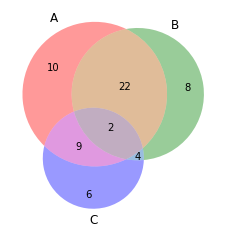

In [139]:
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (10, 8, 22, 
                 6, 9, 4, 
                 2))
plt.show()

In [138]:
df["legal_entity_name"].value_counts()

LVMH Moet Hennessy Louis Vuitton SE                 27576
Richemont                                           21580
Swatch                                              18860
Anheuser-Busch                                      12644
Kering                                              10660
                                                    ...  
Aga Marvel                                            216
WhaleCo Inc                                            55
Goodwill Industries of Orange County                   52
Shenzhen Seulin Culture & Entertainment Co., Ltd       46
Pop Mart International Group Ltd                       46
Name: legal_entity_name, Length: 423, dtype: int64

In [141]:
sum(df["ultimate_parent_legal_entity_name"] != df["primary_exchange_name"]) / len(df)

1.0

In [97]:
df["ultimate_parent_legal_entity_name"].value_counts()

LVMH Moet Hennessy Louis Vuitton SE                 27576
Richemont                                           21580
Swatch                                              18860
Anheuser-Busch                                      12644
Kering                                              10660
                                                    ...  
Aga Marvel                                            216
Pinduoduo                                              55
Goodwill Industries International Inc                  52
Pop Mart International Group Ltd                       46
Shenzhen Seulin Culture & Entertainment Co., Ltd       46
Name: ultimate_parent_legal_entity_name, Length: 401, dtype: int64

In [142]:
#sorted(list(df["ultimate_parent_legal_entity_name"].value_counts().keys()))

In [143]:
#sorted(list(df["primary_exchange_name"].value_counts().keys()))

In [263]:
sorted(list(df["domicile_country_name"].value_counts().keys()))

[';',
 ';France',
 'Australia',
 'Belgium',
 'Belgium;',
 'Brazil',
 'Canada',
 'China',
 'China;Hong Kong',
 'Denmark',
 'France',
 'Germany',
 'Hong Kong',
 'Italy',
 'Japan',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Philippines',
 'Poland',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America']

In [261]:
#df["primary_exchange_name"].value_counts() 

In [35]:
pd.crosstab(df["compset_group"], df["compset"]).

compset,Alcohol,Apparel Retail,Athleisure,Beauty & Boutique,Beverages,Building Products,Casual Dining,Coffee,Dermatology,Dermatology and Orthodontics,Discount Retailers,Ecommerce Apparel Retail,Ecommerce Luxury Apparel Retail,Ecommerce Mainstream Apparel Retail,Energy drinks,Entertainment,Fast Casual,Fast Fashion,Fitness & Exercise,Food Products,Food Retail,Footwear,Global Luxury Analysts Interest List,Hard Luxury,Home Appliances,Latam Apparel Retail,Luxury & Premium & Mainstream,Mainstream Brands,Mattress,Mid-Range Watch & Jewelry,Omnichannel Apparel Retail,Orthodontics,Outdoor Gear,Pasta Sauce,Petcare,Plant-Based Dairy,Plant-Based Meat,Premium Brands,QSR,Restaurants,Snack Bars,Soda,Soft Luxury,Sporting Goods,Sports drinks,Sportswear,Sportswear & Athleisure,Study (All Brands),Toys & Collectibles,US Department Store,US Discount Store,US Softlines Analyst Interest List,Workout Gear,Yoghurt
compset_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apparel Retail,0,69341,810,0,0,0,0,0,0,0,0,19614,5741,9463,0,0,0,19281,0,0,0,4059,0,0,0,3640,0,0,0,1529,25049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5005,4849,41192,0,0
Beauty & Boutique,0,0,0,44266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beverages,13367,0,0,0,20053,0,0,0,0,0,0,0,0,0,2678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3562,0,0,1811,0,0,0,0,0,0,0,0,0
Building Products,0,0,0,0,0,4376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dermatology and Orthodontics,0,0,0,0,0,0,0,0,2824,3682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Discount Retailers,0,0,0,0,0,0,0,0,0,0,2100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Entertainment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fitness & Exercise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Food Products,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20396,0,0,0,0,0,0,0,0,0,0,0,0,0,2495,0,4843,7618,0,0,0,4075,0,0,0,0,0,0,0,0,0,0,0,0,3185


**Question**: how many compsets can be in one compset_group?
- Up to 13
- on average 3.05
- min 

In [260]:
#df.drop_duplicates(["compset_group", "compset"]).groupby("compset_group").count()["compset"]

In [41]:
df.drop_duplicates(["compset_group", "compset"]).groupby("compset_group").count()["compset"].value_counts()

1     12
5      2
6      2
13     1
3      1
9      1
2      1
Name: compset, dtype: int64

**Question**: how many compset_groups can be in one compset_group?

1. We have 4 insteresting cases where more than 1 compset group!

In [43]:
df.drop_duplicates(["compset_group", "compset"]).groupby("compset").count()["compset_group"].value_counts()

1    50
2     2
3     1
4     1
Name: compset_group, dtype: int64

In [44]:
df[cat_vars].head()

,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name
0,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
1,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
2,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
3,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
4,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange


**Hypothesis**

BE -> (1) Legal Entity
BE -> (1) Domicile Country
LegalE <-> Domicile Country

PrimaryExchangeName = Ultimate Parent 

In [64]:
#df[["ultimate_parent_legal_entity_name", "primary_exchange_name"]].drop_duplicates()
def check_max_correspondence(varname1, varname2, varname1Str="max1", varname2Str = "max2", df=df):
    max1=df.drop_duplicates([varname1, varname2]).groupby(varname1).count()[varname2].max()
    max2=df.drop_duplicates([varname1, varname2]).groupby(varname2).count()[varname1].max()
    print(f"For each {varname1Str} there is up to {max1} of {varname2Str}")
    print(f"For each {varname2Str} there is up to {max2} of {varname1Str}")
    return {varname1Str : max1, varname2Str: max2}
    
check_max_correspondence("ultimate_parent_legal_entity_name", "primary_exchange_name",
                         "ultimate_parent_legal_entity_name", "primary_exchange_name")

For each ultimate_parent_legal_entity_name there is up to 2 of primary_exchange_name
For each primary_exchange_name there is up to 68 of ultimate_parent_legal_entity_name


{'ultimate_parent_legal_entity_name': 2, 'primary_exchange_name': 68}

In [ ]:
df.drop_duplicates([varname1, varname2]).groupby(varname1).count()[varname2].max

In [170]:
check_max_correspondence("business_entity_doing_business_as_name", "domicile_country_name",
                         "business_entity_doing_business_as_name", "domicile_country_name")

For each business_entity_doing_business_as_name there is up to 1 of domicile_country_name
For each domicile_country_name there is up to 122 of business_entity_doing_business_as_name


{'business_entity_doing_business_as_name': 1, 'domicile_country_name': 122}

In [169]:
check_max_correspondence("legal_entity_name", "domicile_country_name",
                         "legal_entity_name", "domicile_country_name")

For each legal_entity_name there is up to 1 of domicile_country_name
For each domicile_country_name there is up to 122 of legal_entity_name


{'legal_entity_name': 1, 'domicile_country_name': 122}

In [168]:
check_max_correspondence("legal_entity_name", "compset",
                         "legal_entity_name", "compset")

For each legal_entity_name there is up to 10 of compset
For each compset there is up to 158 of legal_entity_name


{'legal_entity_name': 10, 'compset': 158}

In [167]:
check_max_correspondence("business_entity_doing_business_as_name", "compset",
                         "business_entity_doing_business_as_name", "compset")

For each business_entity_doing_business_as_name there is up to 10 of compset
For each compset there is up to 158 of business_entity_doing_business_as_name


{'business_entity_doing_business_as_name': 10, 'compset': 158}

In [174]:
check_max_correspondence("legal_entity_name", "business_entity_doing_business_as_name",
                         "legal_entity_name", "business_entity_doing_business_as_name")

For each legal_entity_name there is up to 1 of business_entity_doing_business_as_name
For each business_entity_doing_business_as_name there is up to 1 of legal_entity_name


{'legal_entity_name': 1, 'business_entity_doing_business_as_name': 1}

In [165]:
df.drop_duplicates(["legal_entity_name", "business_entity_doing_business_as_name"]).groupby(varname1).count()[varname2]

NameError: name 'varname1' is not defined

In [166]:
check_max_correspondence("compset_group", "business_entity_doing_business_as_name",
                         "compset_group", "business_entity_doing_business_as_name")                        

For each compset_group there is up to 111 of business_entity_doing_business_as_name
For each business_entity_doing_business_as_name there is up to 3 of compset_group


{'compset_group': 111, 'business_entity_doing_business_as_name': 3}

In [80]:
df.drop_duplicates(["compset_group", "business_entity_doing_business_as_name"]).groupby("business_entity_doing_business_as_name").count()["compset_group"].sort_values()

business_entity_doing_business_as_name
24S                   1
Pedigree              1
Peloton               1
Peoples Jewellers     1
Pepsi                 1
                     ..
Five Below            1
Flywheel Sports       1
Field Roast           1
shopDisney            1
All Brands           20
Name: compset_group, Length: 706, dtype: int64

Data Cleaning:
1. ; is an na in the county
2. ;France to France
3. China;Hong Kong => Honking

In [60]:
df["domicile_country_name"].value_counts()

United States of America                                193509
France                                                   62164
Switzerland                                              44746
United Kingdom of Great Britain and Northern Ireland     31368
Brazil                                                   17243
Hong Kong                                                16151
Japan                                                    15357
Germany                                                  13438
Belgium                                                  12644
Italy                                                    10416
Spain                                                    10010
Netherlands                                               6280
Canada                                                    6170
Sweden                                                    5460
Australia                                                 4004
New Zealand                                            

In [284]:
df.loc[df["domicile_country_name"] == "Belgium;"]

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
577535,Weekly,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,134791.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577536,Weekly,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,96571.0,11.0,0.0,194.0,2123.0,2317.0,2134.0,0.023993,0.023993,193.00,NaN,17.636364,NaN,0.0,0.0,1.0
577537,Weekly,2016-10-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577538,Weekly,2019-10-19,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,76904.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577539,Weekly,2022-06-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,106107.0,1.0,0.0,6.0,84.0,90.0,85.0,0.000848,0.000848,84.00,NaN,6.000000,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578336,Weekly,2020-01-04,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,76975.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578337,Weekly,2020-04-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,76505.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578338,Weekly,2016-04-09,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578339,Weekly,2018-05-05,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,NaN,4.0,0.0,86.0,3289.0,3375.0,3293.0,NaN,NaN,822.25,NaN,21.500000,NaN,0.0,0.0,1.0


In [285]:
df.loc[[577535, 577536]]

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
577535,Weekly,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,134791.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577536,Weekly,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,96571.0,11.0,0.0,194.0,2123.0,2317.0,2134.0,0.023993,0.023993,193.0,NaN,17.636364,NaN,0.0,0.0,1.0


## Some new vars creation

In [152]:
df.drop_duplicates(["business_entity_doing_business_as_name"]).groupby(["business_entity_doing_business_as_name"]).count()["compset"]

business_entity_doing_business_as_name
24S                  1
3.1 Phillip Lim      1
3CE                  1
A. Lange & Soehne    1
ANIMALE              1
                    ..
bareMinerals         1
dd's Discounts       1
e.l.f.               1
iRobot               1
shopDisney           1
Name: compset, Length: 706, dtype: int64

In [186]:
#df.drop_duplicates(["compset", "compset_group"]).groupby(["compset"]).count()["compset_group"].sort_values()

In [161]:
for i in cat_vars:
    unique_vals = len(df.drop_duplicates([i]))
    print(f"{i}: {unique_vals}")

compset_group: 20
compset: 54
business_entity_doing_business_as_name: 706
legal_entity_name: 424
domicile_country_name: 27
ultimate_parent_legal_entity_name: 402
primary_exchange_name: 31


# Conversion Rate Variable Creation

In [264]:
df.head(5)

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,6128444.0,6112302.0,0.277730,0.277730,63012.422680,4.701696e+05,167.412371,1249.153846
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,3202502.0,3189198.0,0.131845,0.131845,59058.222222,1.594572e+06,247.370370,6679.000000
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,2168849.0,2152997.0,0.303869,0.303869,51260.833333,2.691194e+05,378.428571,1986.750000
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,5251678.0,5224989.0,0.277850,0.277850,71574.191781,5.805462e+05,366.602740,2973.555556
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,5786668.0,5761041.0,0.191286,0.191286,106684.944444,5.760987e+05,475.574074,2568.100000


**Assumtion**

1. the likes and the comments are for the videos from the same week

In [277]:
engagement_vars = ["followers", "pictures", "videos", "comments", "likes"]
df_contin = df[engagement_vars].copy()

# total involeveme
df["total_involvement"] = df["comments"] + df["likes"]
df["total_company_activity"] = df["pictures"] + df["videos"]

df["conversion_rate_total"] = df["total_involvement"] / df["followers"]
df["return_on_activity"] = df["total_company_activity"] / df["total_involvement"] 

# COntent type
df["ratio_of_videos"] = df["videos"] / (df["pictures"] + df["videos"])
df["ratio_of_pictures"] = df["pictures"] / (df["pictures"] + df["videos"])

# ASSUMTION: we only like videos / photos from this week
df["likes_per_picture"] = df["likes"] / df["pictures"]
df["likes_per_video"] =   df["likes"] / df["videos"]
df["comments_per_picture"] =  df["comments"] / df["pictures"] 
df["comments_per_video"] =   df["comments"] / df["videos"]

# take care of zeros
df.loc[df["pictures"] + df["videos"] == 0, "ratio_of_videos"] = np.nan
df.loc[df["pictures"] + df["videos"] == 0, "ratio_of_pictures"] = np.nan

df.loc[df["pictures"] == 0, "likes_per_picture"] = np.nan
df.loc[df["videos"] == 0, "likes_per_video"] = np.nan
df.loc[df["pictures"] == 0, "comments_per_picture"] = np.nan
df.loc[df["videos"] == 0, "comments_per_video"] = np.nan

In [278]:
new_vars = ["videos", "pictures", "likes", "comments", "total_involvement", "total_company_activity", "conversion_rate_total", "likes_per_picture", "likes_per_video",
           "comments_per_picture", "comments_per_video", "content_type", "ratio_of_videos", "ratio_of_pictures"]
df[new_vars].describe()

,videos,pictures,likes,comments,total_involvement,total_company_activity,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
count,684349.000000,695803.000000,6.959770e+05,6.953430e+05,6.953430e+05,6.958030e+05,571335.000000,6.822940e+05,5.904110e+05,681803.000000,5.900780e+05,671858.000000,675227.000000,675227.000000
mean,61.244426,344.272540,2.163189e+06,3.043246e+04,2.195594e+06,2.164074e+06,0.239651,8.978570e+03,9.008996e+04,110.272339,1.079813e+03,0.304412,0.170257,0.829743
std,564.468480,2777.396873,1.803193e+07,2.766459e+05,1.826839e+07,1.803673e+07,6.573920,2.443292e+04,4.153716e+05,467.846213,6.409057e+03,0.831057,0.173016,0.173016
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,19.000000,1.727700e+04,3.710000e+02,1.826200e+04,1.734900e+04,0.049821,4.764973e+02,2.642609e+03,10.742857,6.306667e+01,0.047619,0.045714,0.759259
50%,7.000000,44.000000,9.318400e+04,1.435000e+03,9.615600e+04,9.333400e+04,0.117294,1.693437e+03,1.176950e+04,29.121212,1.870357e+02,0.136364,0.121212,0.878788
75%,20.000000,122.000000,4.577470e+05,5.872000e+03,4.670355e+05,4.581020e+05,0.243321,6.807873e+03,5.349414e+04,83.333333,5.940000e+02,0.312500,0.240741,0.954286
max,35905.000000,141746.000000,7.120711e+08,1.732046e+07,7.203395e+08,7.121634e+08,2892.755136,1.660860e+06,3.488018e+07,32546.791667,1.218564e+06,45.000000,1.000000,1.000000


**Observation**

1. There is more envolvement for videos than for images
2. There are more likes than comments

In [257]:
#np.repeat("like", len())
ratio = pd.concat([df["likes_per_picture"], df["likes_per_video"], 
          df["comments_per_picture"], df["comments_per_video"]])

activity = pd.concat([pd.Series(np.repeat("like", len(df))), pd.Series(np.repeat("like", len(df))),
          pd.Series(np.repeat("comment", len(df))), pd.Series(np.repeat("comment", len(df)))])

content = pd.concat([pd.Series(np.repeat("picture", len(df))), pd.Series(np.repeat("video", len(df))),
          pd.Series(np.repeat("picture", len(df))), pd.Series(np.repeat("video", len(df)))])

#df_help = pd.DataFrame

d = {'ratio': ratio, 'activity': activity, 'content': content }
df_help = pd.DataFrame(data=d)
df_help 

,ratio,activity,content
0,63012.422680,like,picture
1,59058.222222,like,picture
2,51260.833333,like,picture
3,71574.191781,like,picture
4,106684.944444,like,picture
...,...,...,...
704308,158.875000,comment,video
704309,882.000000,comment,video
704310,48.485714,comment,video
704311,986.000000,comment,video


In [ ]:
**Are**

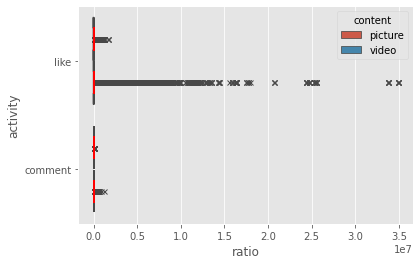

In [266]:
sns.boxplot(data=df_help, x="ratio", y="activity", hue="content",
           notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2})
ax.set_yscale('log')
plt.show()

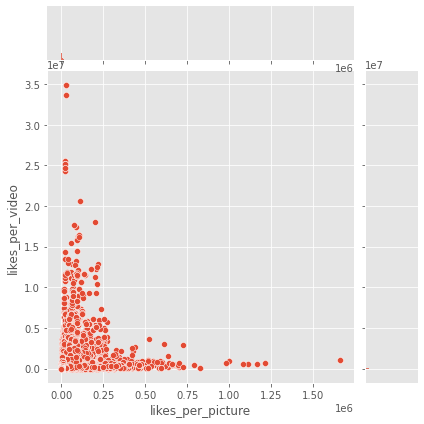

In [259]:
sns.jointplot(data=df, x="likes_per_picture", y="likes_per_video")
plt.show()

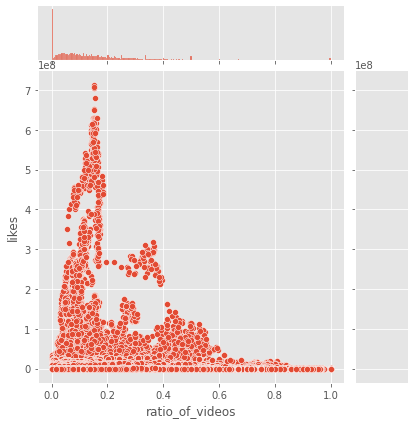

In [280]:
sns.jointplot(data=df, x="ratio_of_videos", y="likes")
plt.show()

In [216]:
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,6128444.0,6112302.0,1.002641
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,3202502.0,3189198.0,1.004172
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,2168849.0,2152997.0,1.007363
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,5251678.0,5224989.0,1.005108
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,5786668.0,5761041.0,1.004448


In [281]:
#df.groupby(["business_entity_doing_business_as_name"]).max()["followers"].sort_values()

In [220]:
#df.groupby(["business_entity_doing_business_as_name"]).sum()["likes"].sort_values()

business_entity_doing_business_as_name
Boca                 4.146400e+04
Dysport              7.061400e+04
ShopGoodwill         9.373600e+04
Finding Unicorn      1.005700e+05
Meow Mix             1.090440e+05
                         ...     
Adidas               1.503993e+10
SHEIN                1.639037e+10
Victoria's Secret    2.136851e+10
Fashion Nova         4.437581e+10
All Brands           1.011369e+12
Name: likes, Length: 706, dtype: float64

In [ ]:
#sns.pairplot(df[engagement_vars])

In [282]:
new_vars = ["followers", "videos", "pictures", "likes", "comments", "total_involvement", "total_company_activity", 
            "conversion_rate_total", "likes_per_picture", "likes_per_video",
            "comments_per_picture", "comments_per_video", 
            "ratio_of_videos", "ratio_of_pictures"]

corr = df[new_vars].corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#f, ax = plt.subplots(figsize=(10, 8))
#sns.heatmap(corr,
#    cmap=sns.diverging_palette(220, 10, as_cmap=True),
#    vmin=0, vmax=1.0,
#    square=True, ax=ax)

/var/folders/xx/6tz780r13t57q640kxzkc46w0000gn/T/ipykernel_47719/2489022727.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,followers,videos,pictures,likes,comments,total_involvement,total_company_activity,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,ratio_of_videos,ratio_of_pictures
followers,1.00,0.84,0.85,0.79,0.78,0.80,0.80,-0.00,0.04,0.01,0.01,-0.00,-0.00,0.00
videos,0.84,1.00,0.85,0.74,0.75,0.74,0.74,0.00,-0.01,-0.02,-0.00,-0.01,0.04,-0.04
pictures,0.85,0.85,1.00,0.93,0.88,0.93,0.93,0.00,-0.01,-0.00,-0.01,-0.00,-0.03,0.03
likes,0.79,0.74,0.93,1.00,0.82,1.00,1.00,0.00,0.07,0.05,0.02,0.02,-0.02,0.02
comments,0.78,0.75,0.88,0.82,1.00,0.83,0.82,0.00,0.03,0.02,0.15,0.12,-0.02,0.02
total_involvement,0.80,0.74,0.93,1.00,0.83,1.00,1.00,0.00,0.07,0.05,0.03,0.02,-0.02,0.02
total_company_activity,0.80,0.74,0.93,1.00,0.82,1.00,1.00,0.00,0.07,0.05,0.02,0.02,-0.02,0.02
conversion_rate_total,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.01,0.01,0.01,-0.01,0.01
likes_per_picture,0.04,-0.01,-0.01,0.07,0.03,0.07,0.07,0.01,1.00,0.29,0.42,0.15,0.15,-0.15
likes_per_video,0.01,-0.02,-0.00,0.05,0.02,0.05,0.05,0.01,0.29,1.00,0.12,0.44,-0.15,0.15


## Comptetition

1. Competition => count
    1. by compset_group
    2. by compset_group and country 
2. Market share: followers / total followers = followers, videos, pictures, likes, comments
    1. by compset_group
    2. by compset_group and country 
3. Activity compared to competition => 
    1. percentage of videos
    2. percentage of pictures
    3. percentage of total content
    4. rank video
    5. rank pictures
    6. rank total
4. Success compared to competitors
    1. likes out of total likes
    2. comments out of total commemts
    3. likes per picture vs overall likes per picture
    4. comments per picture vs overall comments per picture

Assumtion:
1. All their competitors are captured within the compset_group

In [417]:
vars_to_aggreg = ["followers", "videos", "pictures", "likes", "comments"]

vars_agg_ind = ["period_end_date", "compset_group", "business_entity_doing_business_as_name"]
vars_agg_ind_small = ["period_end_date", "compset_group"]

vars_agg_ind_country = ["period_end_date", "compset_group", "domicile_country_name", "business_entity_doing_business_as_name"]
vars_agg_ind_country_small = ["period_end_date", "compset_group", "domicile_country_name"]

In [418]:
#df.head(4)
df_group_ind = df.drop_duplicates(vars_agg_ind).groupby(vars_agg_ind_small)
df_group_ind_country = df.drop_duplicates(vars_agg_ind_country).groupby(vars_agg_ind_country_small)

Number of companies in the compset_group active the same week

In [419]:
df_cnt_industry = pd.DataFrame(df_group_ind.count()["business_entity_doing_business_as_name"])

Number of companies in the compset_group active the same week in the same country

In [420]:
df_cnt_industry_country = pd.DataFrame(df_group_ind_country.count()["business_entity_doing_business_as_name"])

Sum of different values

In [421]:
df_sum_industry = df_group_ind.sum()[vars_to_aggreg]
df_sum_industry_country = df_group_ind_country.sum()[vars_to_aggreg]

Rename the variables prior to join

In [422]:
df_cnt_industry.rename(lambda x: x + "_cnt_industry", axis='columns', inplace=True)
df_cnt_industry_country.rename(lambda x: x + "_cnt_industry_country", axis='columns', inplace=True)
df_sum_industry.rename(lambda x: x + "_sum_industry", axis='columns', inplace=True)
df_sum_industry_country.rename(lambda x: x + "_sum_industry_country", axis='columns', inplace=True)

In [411]:
#vars_agg_ind_country_small

['period_end_date', 'compset_group', 'domicile_country_name']

In [423]:
df_sum_industry_country.head(5)

followers_sum_industry_country  \
period_end_date compset_group  domicile_country_name                                   
2015-01-03      Apparel Retail Brazil                                      1062150.0   
                               Germany                                           0.0   
                               Hong Kong                                     34373.0   
                               Japan                                             0.0   
                               Poland                                            0.0   

                                                      videos_sum_industry_country  \
period_end_date compset_group  domicile_country_name                                
2015-01-03      Apparel Retail Brazil                                        11.0   
                               Germany                                        1.0   
                               Hong Kong                                      0.0   
                               Japan                                          1.0   
                               Poland                                         0.0   

                                                      pictures_sum_industry_country  \
period_end_date compset_group  domicile_country_name                                  
2015-01-03      Apparel Retail Brazil                                         216.0   
                               Germany                                         62.0   
                               Hong Kong                                       12.0   
                               Japan                                          193.0   
                               Poland                                          15.0   

                                                      likes_sum_industry_country  \
period_end_date compset_group  domicile_country_name                               
2015-01-03      Apparel Retail Brazil                                   553164.0   
                               Germany                                   25210.0   
                               Hong Kong                                  5889.0   
                               Japan                                     39180.0   
                               Poland                                      376.0   

                                                      comments_sum_industry_country  
period_end_date compset_group  domicile_country_name                                 
2015-01-03      Apparel Retail Brazil                                       15760.0  
                               Germany                                        407.0  
                               Hong Kong                                       73.0  
                               Japan                                          942.0  
                               Poland                                           5.0

In [424]:
df_cnt_industry_country.head()

business_entity_doing_business_as_name_cnt_industry_country
period_end_date compset_group  domicile_country_name                                                             
2015-01-03      Apparel Retail Brazil                                                                 8          
                               Germany                                                                2          
                               Hong Kong                                                              1          
                               Japan                                                                  2          
                               Poland                                                                 1

**THE JOIN**


<div class="alert alert-block alert-warning">
<b>Careful: </b> you need to do it only once, otherwise there will be name conflict and you would need to load the df again
</div>

That is why the 4 join sells below are commented out

In [433]:
#df = df.join(df_cnt_industry, on=vars_agg_ind_small)

In [426]:
#df = df.join(df_cnt_industry_country, on=vars_agg_ind_country_small)

In [427]:
#df = df.join(df_sum_industry, on=vars_agg_ind_small)

In [428]:
#df = df.join(df_sum_industry_country, on=vars_agg_ind_country_small)

In [429]:
df.head(5)

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,business_entity_doing_business_as_name_cnt_industry,business_entity_doing_business_as_name_cnt_industry_country,followers_sum_industry,videos_sum_industry,pictures_sum_industry,likes_sum_industry,comments_sum_industry,followers_sum_industry_country,videos_sum_industry_country,pictures_sum_industry_country,likes_sum_industry_country,comments_sum_industry_country
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,146,32.0,1.175661e+09,2642.0,14793.0,182298392.0,1049640.0,148204010.0,513.0,2979.0,27296720.0,198975.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,146,32.0,8.166047e+08,1646.0,19400.0,103628524.0,810836.0,157893900.0,297.0,2952.0,13152443.0,104895.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,141,31.0,3.452757e+08,1086.0,11350.0,119219647.0,729900.0,37394499.0,271.0,3376.0,17397412.0,138434.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,146,32.0,7.180901e+08,1808.0,12458.0,139475900.0,879572.0,129106789.0,459.0,3148.0,37850966.0,169338.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,146,32.0,9.795134e+08,3266.0,10071.0,91658197.0,757698.0,178743779.0,685.0,1939.0,20291877.0,144929.0


### Creating Rations

In [432]:
df.columns

Index(['period', 'period_end_date', 'compset_group', 'compset',
       'business_entity_doing_business_as_name', 'legal_entity_name',
       'domicile_country_name', 'ultimate_parent_legal_entity_name',
       'primary_exchange_name', 'calculation_type', 'followers', 'pictures',
       'videos', 'comments', 'likes',
       'business_entity_doing_business_as_name_cnt_industry',
       'business_entity_doing_business_as_name_cnt_industry_country',
       'followers_sum_industry', 'videos_sum_industry',
       'pictures_sum_industry', 'likes_sum_industry', 'comments_sum_industry',
       'followers_sum_industry_country', 'videos_sum_industry_country',
       'pictures_sum_industry_country', 'likes_sum_industry_country',
       'comments_sum_industry_country'],
      dtype='object')

In [434]:
vars_to_create = ["followers", "videos", "pictures", "likes", "comments"]

for varname in vars_to_create:
    # define varnames
    # input
    aggreg_ind = varname + "_sum_industry"
    aggreg_ind_country = varname + "_sum_industry_country"
    # output
    out_agg_ind = "fraction_" + aggreg_ind
    out_agg_ind_country = "fraction_" + aggreg_ind_country
    # compute fraction
    df[out_agg_ind] = df[varname] / df[aggreg_ind]
    df[out_agg_ind_country] =  df[varname] / df[aggreg_ind_country]
    # add missing values
    df.loc[df[aggreg_ind] == 0, out_agg_ind] = np.nan
    df.loc[df[aggreg_ind_country] == 0, out_agg_ind_country] = np.nan
    # print status
    print(f"Created {out_agg_ind} from {varname} and {aggreg_ind}")
    print(f"Created {out_agg_ind_country} from {varname} and {aggreg_ind_country}")

Created fraction_followers_sum_industry from followers and followers_sum_industry
Created fraction_followers_sum_industry_country from followers and followers_sum_industry_country
Created fraction_videos_sum_industry from videos and videos_sum_industry
Created fraction_videos_sum_industry_country from videos and videos_sum_industry_country
Created fraction_pictures_sum_industry from pictures and pictures_sum_industry
Created fraction_pictures_sum_industry_country from pictures and pictures_sum_industry_country
Created fraction_likes_sum_industry from likes and likes_sum_industry
Created fraction_likes_sum_industry_country from likes and likes_sum_industry_country
Created fraction_comments_sum_industry from comments and comments_sum_industry
Created fraction_comments_sum_industry_country from comments and comments_sum_industry_country


**QUESTION (optional)** Why is there up to 3?

In [290]:
check_max_correspondence("business_entity_doing_business_as_name", "compset_group",
                         "business_entity_doing_business_as_name", "compset_group")

For each business_entity_doing_business_as_name there is up to 3 of compset_group
For each compset_group there is up to 111 of business_entity_doing_business_as_name


{'business_entity_doing_business_as_name': 3, 'compset_group': 111}

In [292]:
#help(check_max_correspondence)

# Time Series Visualizations

1. ACF / PCF
3. Boxplot month
4. Create lagged variables

In [436]:
df['period_end_date'] = pd.to_datetime(df['period_end_date'])

In [446]:
num_companies_active = df.drop_duplicates(['period_end_date', 'business_entity_doing_business_as_name']).groupby('period_end_date').count()['business_entity_doing_business_as_name']

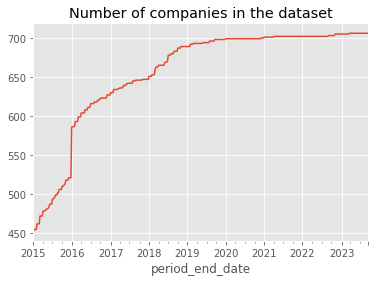

In [447]:
num_companies_active.plot()
plt.title("Number of companies in the dataset")
plt.show()

In [454]:
df['period_end_month'] = df['period_end_date'].dt.month
df['period_end_year'] = df['period_end_date'].dt.year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


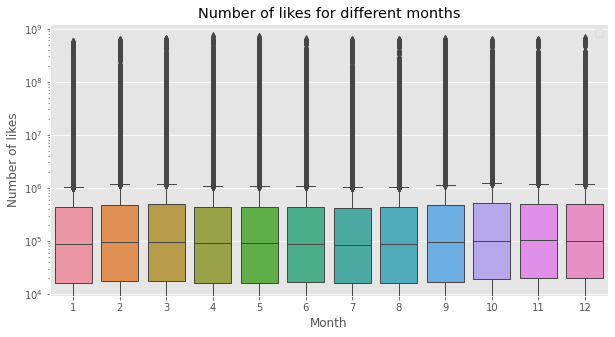

In [458]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df[['period_end_month', 'period_end_year', 'likes']].dropna(),
            x='period_end_month',
            y='likes',
            #hue='period_end_year',
            ax=ax,
            linewidth=1)
ax.set_title('Number of likes for different months')
ax.set_xlabel('Month')
ax.set_ylabel('Number of likes')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_yscale('log')
plt.show()

Number of likes per company

In [ ]:
# Get sample values for company names
#df.value_counts(['business_entity_doing_business_as_name'])

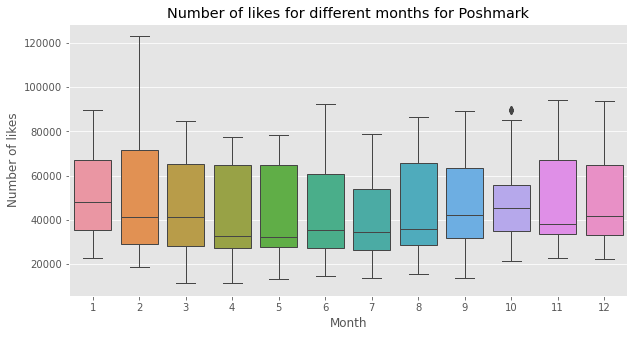

In [466]:
company_name = 'Poshmark'

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df.loc[df['business_entity_doing_business_as_name'] == company_name,['period_end_month', 'period_end_year', 'likes']].dropna(),
            x='period_end_month',
            y='likes',
            #hue='period_end_year',
            ax=ax,
            linewidth=1)
ax.set_title(f'Number of likes for different months for {company_name}')
ax.set_xlabel('Month')
ax.set_ylabel('Number of likes')
#ax.legend(bbox_to_anchor=(1, 1))
#ax.set_yscale('log')
plt.show()

In [472]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

### Partial autocorrelation individual companies (OPTIONAL)

In [547]:
lag_acf = 12
lag_pacf = 12
width, height = 15, 6
var_of_interest = 'likes'
company_name = 'Poshmark'
# 'followers', 'comments', 'likes'
vars_to_autocorrelate = ['followers', 'comments', 'likes']

#f, ax = plt.subplots(nrows=3, ncols=2, figsize=(width, 2*height))

df_comp_ts = df.loc[df['business_entity_doing_business_as_name'] == company_name, ['period_end_date', 'followers', 'comments', 'likes']]
df_comp_ts.drop_duplicates(['period_end_date'])
df_comp_ts.set_index('period_end_date')
"""

for idx, varname in enumerate(vars_to_autocorrelate):
    print(idx)
    plot_acf(df_comp_ts[varname],lags=lag_acf, ax=ax[idx][0], missing='drop')
    plot_pacf(df_comp_ts[varname],lags=lag_pacf, ax=ax[idx][1], method='ols')
    ax[idx, 0].set_title(f"Autocorrelation correlation {varname}")
    ax[idx, 1].set_title(f"Partial autocorrelation {varname}")
    
                         
plt.show()
"""

'\n\nfor idx, varname in enumerate(vars_to_autocorrelate):\n    print(idx)\n    plot_acf(df_comp_ts[varname],lags=lag_acf, ax=ax[idx][0], missing=\'drop\')\n    plot_pacf(df_comp_ts[varname],lags=lag_pacf, ax=ax[idx][1], method=\'ols\')\n    ax[idx, 0].set_title(f"Autocorrelation correlation {varname}")\n    ax[idx, 1].set_title(f"Partial autocorrelation {varname}")\n    \n                         \nplt.show()\n'

## Aggregate by all companies (mean) IMPORTANT

In [540]:
df_agg_time = df.drop_duplicates(['business_entity_doing_business_as_name', 'period_end_date', 'followers', 'comments', 'likes']).groupby(['period_end_date']).mean()

0
1
2


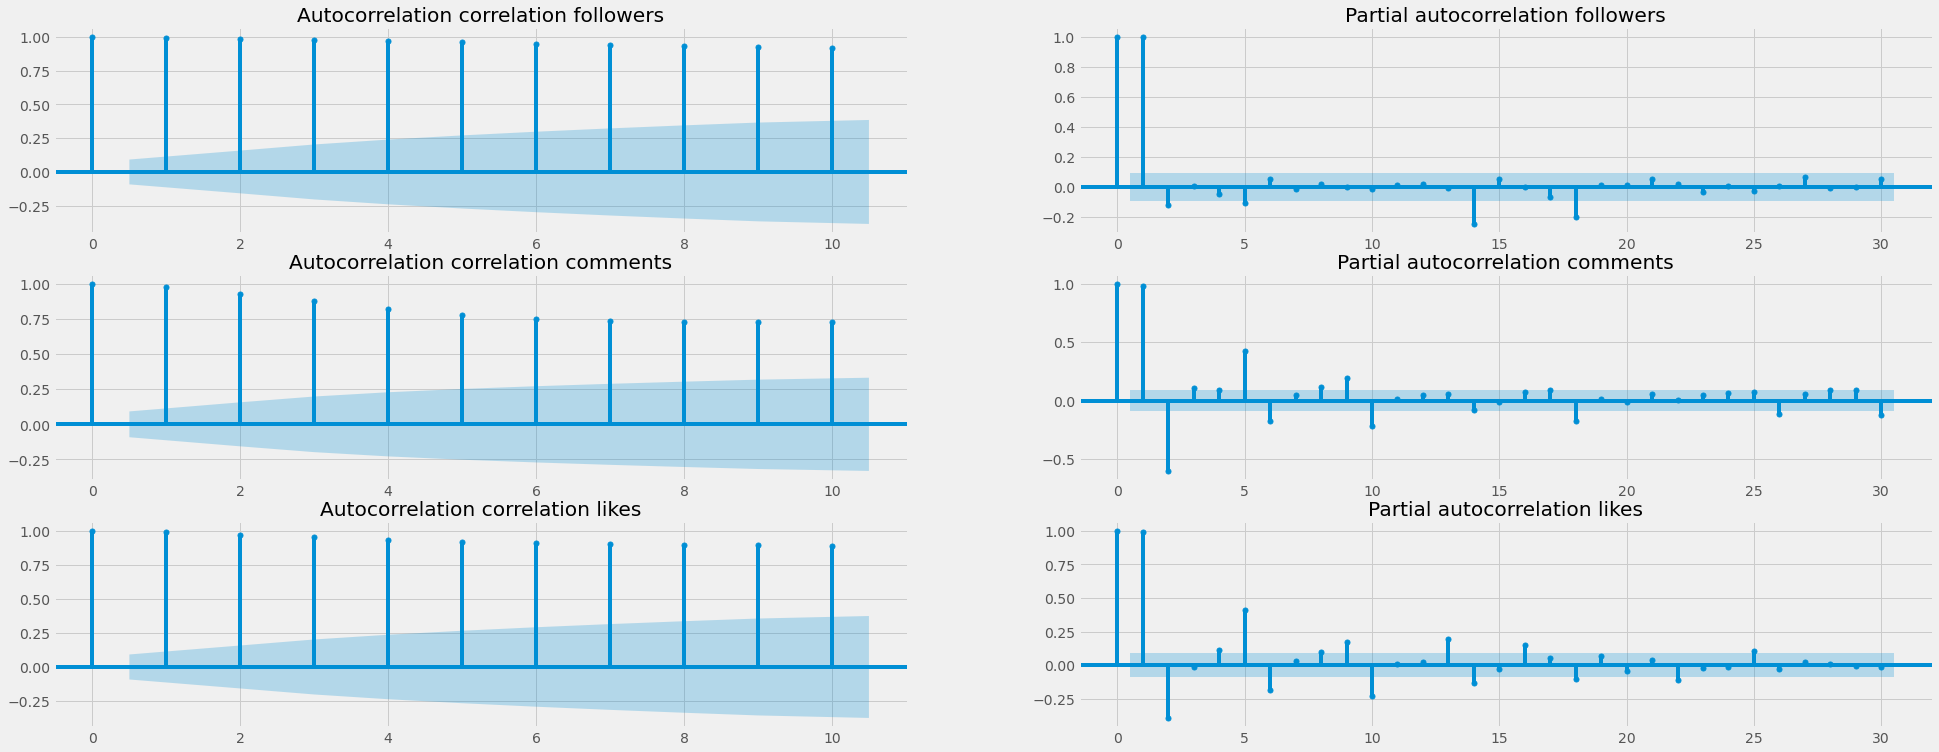

In [545]:
lag_acf = 10
lag_pacf = 30

width, height = 30, 6

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(width, 2*height))
vars_to_autocorrelate = ['followers', 'comments', 'likes']

for idx, varname in enumerate(vars_to_autocorrelate):
    print(idx)
    plot_acf(df_agg_time[varname],lags=lag_acf, ax=ax[idx][0], missing='drop')
    plot_pacf(df_agg_time[varname],lags=lag_pacf, ax=ax[idx][1], method='ols')
    ax[idx, 0].set_title(f"Autocorrelation correlation {varname}")
    ax[idx, 1].set_title(f"Partial autocorrelation {varname}")
    
                         
f.show()

**CONCLUSION**

1. Followers: significant lags: 1, 2, 5, 14, 18
2. Likes: 1, 5, 6, 9, 10, 13, 14, 16, 18
3. Comments: 1, 5, 6, 9, 10, 13, 14, 16, 18

**INTERESTING**
1. For **Likes** and **Comments** there is a negative correlation between the engagement 2 weeks ago and current engagement

**PROBLEM**
1. How do we interpret higher lags?
2. Is it the same among the companies?

**TO Try**
1. Other aggregation functions?
2. Analyze by competitive intudstries

## Missing Variables

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>
<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

In [566]:
cat_vars = ["compset_group", "compset", "business_entity_doing_business_as_name",
"legal_entity_name", "domicile_country_name", "ultimate_parent_legal_entity_name",
"primary_exchange_name"]



df_missing_country = df.groupby(["business_entity_doing_business_as_name"]).count()[['period_end_date','domicile_country_name']]
sum(df_missing_country['domicile_country_name'] == 0)/len(df_missing_country)
#"primary_exchange_name" # "ultimate_parent_legal_entity_name"


df_missing_primary = df.groupby(["ultimate_parent_legal_entity_name"]).count()[['period_end_date',"primary_exchange_name"]]
#df_missing_primary.sort_values(by="primary_exchange_name")
sum(df_missing_primary["primary_exchange_name"] == 0)/len(df_missing_primary)

df['is_country_missing'] = df['domicile_country_name'].isna()
df['is_primary_exchange_missing'] = df["primary_exchange_name"].isna()

In [585]:
sum(df['is_country_missing'] == df['is_primary_exchange_missing'])/len(df)

1.0

<div class="alert alert-block alert-danger">
<b>Attention: </b> domicile_country_name and primary_exchange_name are missing simultaneously
</div>

In [577]:
df.groupby('is_country_missing').mean()[['followers', 'likes', 'comments', 'pictures', 'videos']]

,followers,likes,comments,pictures,videos
is_country_missing,,,,,
False,5.134925e+06,6.935946e+05,10310.460646,123.060098,22.216565
True,2.860639e+07,4.879685e+06,67639.582076,753.170754,133.574642


In [587]:
df.groupby('is_primary_exchange_missing').median()[['followers', 'likes', 'comments', 'pictures', 'videos']]

,followers,likes,comments,pictures,videos
is_primary_exchange_missing,,,,,
False,1132057.0,91869.0,1323.0,41.0,7.0
True,1065329.0,95570.0,1680.0,51.0,7.0


In [584]:
df.drop_duplicates(["business_entity_doing_business_as_name"]).groupby(['is_country_missing']).count()['period_end_date']

is_country_missing
False    467
True     239
Name: period_end_date, dtype: int64

In [583]:
df.drop_duplicates(["business_entity_doing_business_as_name"]).groupby(['is_primary_exchange_missing']).count()['period_end_date']

is_primary_exchange_missing
False    467
True     239
Name: period_end_date, dtype: int64

In [178]:
239 / (239 + 467)

0.3385269121813031

<div class="alert alert-block alert-warning">
<b>Conclusion</b> Remove the columns from the analysis, but not the observations since
    <ol>
    <li> we would loose a lot of data </li>
    <li> the values of interest have higher values for the companies with missing information </li>
        </ol>
</div>

In [595]:
missing_country_companies = df_missing_country.loc[df_missing_country['domicile_country_name']==0].index
list(missing_country_companies)

['3.1 Phillip Lim',
 'About You',
 'Acne Studios',
 'Aeropostale',
 'Aldi',
 'Aldo',
 'Alexander Wang',
 'Alice & Olivia',
 'All Brands',
 'AllSaints',
 'Almond Breeze',
 'Alo Yoga',
 'Amaro',
 'Anastasia Beverly Hills',
 'Anthropologie',
 "Applebee's",
 'Armani',
 'Audemars Piguet',
 'Avon',
 'Balmain',
 'Balmain Beauty',
 'Bang',
 'Barilla',
 'Barneys New York',
 "Barry's Bootcamp",
 'Bass Pro Shops',
 'Bell & Ross',
 'Belotero',
 'Bergdorf Goodman',
 'Bertolli',
 'Billabong',
 'Bjorg',
 'Blaze Pizza',
 'Blink Fitness',
 "Bloomingdale's",
 'Bobstore',
 'BodyArmor',
 'Botox',
 'Breitling',
 'Brooks Brothers',
 'Buffalo Wild Wings',
 'C&A',
 "Cabela's",
 'Califia Farms',
 'Cannuka',
 'Capodarte',
 'Carla Amorim',
 'Carmen Steffens',
 'Carolina Herrera',
 'Casper',
 'Chanel',
 'Chanel Beauty',
 'Charlotte Tilbury',
 "Cheddar's Scratch Kitchen",
 'Chick-fil-A',
 "Chili's",
 'Chobani',
 'Chopard',
 'Christian Louboutin',
 'Christian Louboutin Beauty',
 'ClassPass',
 'Clif Bar',
 'Cole Haa

## Missing Country Domicile Imputation

Need to add 238 domiciles

In [158]:
# standardise values

df["business_entity_doing_business_as_name"] = df["business_entity_doing_business_as_name"].apply(lambda x: str(x).strip().lower())
df['domicile_country_name'] = df['domicile_country_name'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)
#.apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

df_missing_country = df.groupby(["business_entity_doing_business_as_name"]).count()[['period_end_date','domicile_country_name']]
missing_country_companies = df_missing_country.loc[df_missing_country['domicile_country_name']==0].index
len(list(missing_country_companies))

239

In [144]:
# ASY local path# split -l 200000 B2
import os
filelist = os.listdir("../data/B2Split/")
len(filelist)
# path = "../data/skylab_instagram_datathon_dataset.csv" # gen

120

In [145]:
path = "../data/B2Split/xaa"
df_domicile = pd.read_csv(path, sep=",",error_bad_lines=False, header=0) #sep='delimiter', header=None)
colnames_domicile = list(df_domicile.columns)
matched_companies = set(df_domicile['name']).intersection(set(missing_country_companies))

df_domicile_add = df_domicile.loc[df_domicile['name'].isin(matched_companies), ['name', 'country']]



# Start the Loop
for idx, filename in enumerate(filelist):
    if filename  != 'B2' and filename != 'xaa':
        path = "../data/B2Split/" + filename 
        print(path)
        df_domicile = pd.read_csv(path, sep=",",error_bad_lines=False, header=None)
        #df.columns = colnames_domicile
        matched_movies_loc = set(df_domicile[6]).intersection(set(missing_country_companies))
        #matched_movies_df = matched_movies.union(matched_movies_loc)
        matched_movies_df = df_domicile.loc[df_domicile[6].isin(matched_movies_loc), [0, 6]]
        matched_movies_df.rename(columns={0: 'country', 6: "name"}, inplace=True)
        df_domicile_add = pd.concat([df_domicile_add, matched_movies_df])
        print(f'{idx} Adding {len(matched_movies_loc)} to total {len(df_comicile_add)}:\n{matched_movies_loc}' )
        

/Users/sychevaa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 26443: expected 10 fields, saw 11\nSkipping line 27637: expected 10 fields, saw 11\nSkipping line 45797: expected 10 fields, saw 14\n'
b'Skipping line 84786: expected 10 fields, saw 11\nSkipping line 120065: expected 10 fields, saw 11\n'
b'Skipping line 168421: expected 10 fields, saw 11\nSkipping line 174683: expected 10 fields, saw 12\nSkipping line 191434: expected 10 fields, saw 12\n'


../data/B2Split/xce


b'Skipping line 3579: expected 10 fields, saw 11\nSkipping line 15746: expected 10 fields, saw 11\n'
b'Skipping line 96097: expected 10 fields, saw 12\nSkipping line 123763: expected 10 fields, saw 11\n'
b'Skipping line 183564: expected 10 fields, saw 11\n'


0 Adding 3 to total 346:
{'wolaco', "chili's", "siggi's dairy"}
../data/B2Split/xcb


b'Skipping line 19572: expected 10 fields, saw 12\n'
b'Skipping line 68950: expected 10 fields, saw 11\nSkipping line 73765: expected 10 fields, saw 11\nSkipping line 78453: expected 10 fields, saw 11\nSkipping line 103889: expected 10 fields, saw 11\n'
b'Skipping line 151147: expected 10 fields, saw 12\nSkipping line 187389: expected 10 fields, saw 11\n'


1 Adding 1 to total 346:
{'orca'}
../data/B2Split/xck


b'Skipping line 23205: expected 10 fields, saw 11\nSkipping line 36975: expected 10 fields, saw 11\n'
b'Skipping line 74825: expected 10 fields, saw 11\nSkipping line 99434: expected 10 fields, saw 11\n'
b'Skipping line 162600: expected 10 fields, saw 12\nSkipping line 170578: expected 10 fields, saw 11\n'


2 Adding 3 to total 346:
{'avon', 'taco bell', 'dune'}
../data/B2Split/xcl


b'Skipping line 77729: expected 10 fields, saw 11\nSkipping line 124183: expected 10 fields, saw 11\n'
b'Skipping line 132413: expected 10 fields, saw 14\nSkipping line 153986: expected 10 fields, saw 13\nSkipping line 170978: expected 10 fields, saw 13\n'


3 Adding 5 to total 346:
{'lacoste', 'equinox', 'aldo', 'avon', 'tuft & needle'}
../data/B2Split/xeg


b'Skipping line 91843: expected 10 fields, saw 11\nSkipping line 117409: expected 10 fields, saw 11\n'


4 Adding 4 to total 346:
{'noosa', 'finish line', 'c&a', 'volcom'}
../data/B2Split/xcy


b'Skipping line 71259: expected 10 fields, saw 14\nSkipping line 88405: expected 10 fields, saw 12\n'


5 Adding 6 to total 346:
{'off-white', 'patagonia', 'igloo', 'dune', 'madison reed', 'bang'}
../data/B2Split/xcp


b'Skipping line 27801: expected 10 fields, saw 11\nSkipping line 32831: expected 10 fields, saw 11\nSkipping line 43647: expected 10 fields, saw 11\n'
b'Skipping line 76799: expected 10 fields, saw 11\nSkipping line 81144: expected 10 fields, saw 11\nSkipping line 88675: expected 10 fields, saw 11\nSkipping line 92819: expected 10 fields, saw 11\nSkipping line 107498: expected 10 fields, saw 11\n'
b'Skipping line 139726: expected 10 fields, saw 11\nSkipping line 151817: expected 10 fields, saw 11\nSkipping line 189196: expected 10 fields, saw 11\n'


6 Adding 3 to total 346:
{'orca', 'whiskas', 'mango'}
../data/B2Split/xei


b'Skipping line 28733: expected 10 fields, saw 12\nSkipping line 47876: expected 10 fields, saw 14\n'
b'Skipping line 155709: expected 10 fields, saw 11\nSkipping line 183933: expected 10 fields, saw 11\n'


7 Adding 4 to total 346:
{'avon', 'new balance', 'suunto', 'nordictrack'}
../data/B2Split/xen


b'Skipping line 15947: expected 10 fields, saw 11\n'
b'Skipping line 70770: expected 10 fields, saw 11\n'
b'Skipping line 137114: expected 10 fields, saw 11\nSkipping line 154033: expected 10 fields, saw 11\n'


8 Adding 4 to total 346:
{'chanel', 'igloo', 'lucky', 'manolo blahnik'}
../data/B2Split/xcw


b'Skipping line 1584: expected 10 fields, saw 11\nSkipping line 36499: expected 10 fields, saw 11\nSkipping line 41261: expected 10 fields, saw 11\n'
b'Skipping line 75727: expected 10 fields, saw 11\nSkipping line 115984: expected 10 fields, saw 11\n'
b'Skipping line 188515: expected 10 fields, saw 11\n'


9 Adding 2 to total 346:
{'natura', 'equinox'}
../data/B2Split/xcm


b'Skipping line 12755: expected 10 fields, saw 11\nSkipping line 30445: expected 10 fields, saw 11\nSkipping line 64415: expected 10 fields, saw 11\n'
b'Skipping line 98830: expected 10 fields, saw 11\n'
b'Skipping line 143271: expected 10 fields, saw 11\nSkipping line 154498: expected 10 fields, saw 14\n'


10 Adding 2 to total 346:
{'helix', 'rude health'}
../data/B2Split/xcj


b'Skipping line 62897: expected 10 fields, saw 12\n'
b'Skipping line 97957: expected 10 fields, saw 11\n'
b'Skipping line 150980: expected 10 fields, saw 13\nSkipping line 152408: expected 10 fields, saw 11\nSkipping line 194683: expected 10 fields, saw 11\n'


11 Adding 1 to total 346:
{'dermalogica'}
../data/B2Split/xcc


b'Skipping line 17529: expected 10 fields, saw 11\nSkipping line 20819: expected 10 fields, saw 14\nSkipping line 50204: expected 10 fields, saw 11\n'
b'Skipping line 78201: expected 10 fields, saw 11\nSkipping line 89580: expected 10 fields, saw 11\nSkipping line 126854: expected 10 fields, saw 11\n'
b'Skipping line 137781: expected 10 fields, saw 11\nSkipping line 141433: expected 10 fields, saw 11\nSkipping line 160717: expected 10 fields, saw 11\nSkipping line 182518: expected 10 fields, saw 11\n'


12 Adding 3 to total 346:
{'bang', 'orca', 'garancia'}
../data/B2Split/xcd


b'Skipping line 21643: expected 10 fields, saw 12\n'
b'Skipping line 86143: expected 10 fields, saw 11\nSkipping line 96332: expected 10 fields, saw 12\n'
b'Skipping line 139116: expected 10 fields, saw 12\n'


13 Adding 4 to total 346:
{'tobi', 'helix', 'main event', 'casper'}
../data/B2Split/xeo


b'Skipping line 4186: expected 10 fields, saw 13\nSkipping line 27159: expected 10 fields, saw 11\n'
b'Skipping line 116731: expected 10 fields, saw 11\n'
b'Skipping line 131192: expected 10 fields, saw 11\n'
b'Skipping line 24625: expected 10 fields, saw 11\nSkipping line 25000: expected 10 fields, saw 11\n'


14 Adding 2 to total 346:
{'cole haan', 'balmain'}
../data/B2Split/xcv


b'Skipping line 72073: expected 10 fields, saw 11\nSkipping line 85674: expected 10 fields, saw 11\n'
b'Skipping line 152889: expected 10 fields, saw 11\n'


15 Adding 2 to total 346:
{'orca', "o'neill"}
../data/B2Split/xcq


b'Skipping line 2554: expected 10 fields, saw 11\nSkipping line 23440: expected 10 fields, saw 12\nSkipping line 29222: expected 10 fields, saw 11\nSkipping line 61945: expected 10 fields, saw 12\n'
b'Skipping line 85680: expected 10 fields, saw 12\nSkipping line 115904: expected 10 fields, saw 11\nSkipping line 117134: expected 10 fields, saw 11\nSkipping line 129956: expected 10 fields, saw 11\n'
b'Skipping line 133471: expected 10 fields, saw 11\n'


16 Adding 3 to total 346:
{'saatva', 'marvel', 'dunlop sports'}
../data/B2Split/xeh


b'Skipping line 7255: expected 10 fields, saw 14\nSkipping line 60924: expected 10 fields, saw 11\n'
b'Skipping line 122439: expected 10 fields, saw 11\nSkipping line 128321: expected 10 fields, saw 11\n'
b'Skipping line 143779: expected 10 fields, saw 11\nSkipping line 170063: expected 10 fields, saw 11\nSkipping line 186222: expected 10 fields, saw 11\n'


17 Adding 3 to total 346:
{'bang', 'igloo', 'ellus'}
../data/B2Split/xea


b'Skipping line 41046: expected 10 fields, saw 14\n'
b'Skipping line 89643: expected 10 fields, saw 11\nSkipping line 101438: expected 10 fields, saw 11\nSkipping line 120786: expected 10 fields, saw 11\nSkipping line 129742: expected 10 fields, saw 11\nSkipping line 130299: expected 10 fields, saw 12\n'
b'Skipping line 180460: expected 10 fields, saw 11\nSkipping line 193312: expected 10 fields, saw 13\n'


18 Adding 5 to total 346:
{'pure group', 'sweetgreen', 'avon', 'califia farms', "bloomingdale's"}
../data/B2Split/xcx


b'Skipping line 22380: expected 10 fields, saw 12\n'
b'Skipping line 66409: expected 10 fields, saw 11\nSkipping line 76323: expected 10 fields, saw 11\nSkipping line 96831: expected 10 fields, saw 14\nSkipping line 104211: expected 10 fields, saw 11\nSkipping line 118168: expected 10 fields, saw 11\n'
b'Skipping line 177362: expected 10 fields, saw 12\nSkipping line 189375: expected 10 fields, saw 11\n'


19 Adding 0 to total 346:
set()
../data/B2Split/xef


b'Skipping line 31424: expected 10 fields, saw 11\nSkipping line 42837: expected 10 fields, saw 11\nSkipping line 53752: expected 10 fields, saw 11\nSkipping line 64326: expected 10 fields, saw 11\n'
b'Skipping line 90785: expected 10 fields, saw 11\n'
b'Skipping line 145192: expected 10 fields, saw 11\nSkipping line 161650: expected 10 fields, saw 11\nSkipping line 187797: expected 10 fields, saw 12\n'


20 Adding 2 to total 346:
{'ragu', 'nobull'}
../data/B2Split/xbr


b'Skipping line 39319: expected 10 fields, saw 11\n'
b'Skipping line 76620: expected 10 fields, saw 11\nSkipping line 80335: expected 10 fields, saw 11\nSkipping line 92446: expected 10 fields, saw 11\n'
b'Skipping line 192494: expected 10 fields, saw 11\n'


22 Adding 0 to total 346:
set()
../data/B2Split/xdk


b'Skipping line 59763: expected 10 fields, saw 13\nSkipping line 60179: expected 10 fields, saw 11\nSkipping line 63281: expected 10 fields, saw 11\n'
b'Skipping line 89006: expected 10 fields, saw 11\nSkipping line 97199: expected 10 fields, saw 11\n'


23 Adding 3 to total 346:
{'orca', 'valentino', 'balmain'}
../data/B2Split/xdl


b'Skipping line 33751: expected 10 fields, saw 11\nSkipping line 63268: expected 10 fields, saw 11\n'
b'Skipping line 103870: expected 10 fields, saw 11\nSkipping line 128434: expected 10 fields, saw 11\n'
b'Skipping line 139760: expected 10 fields, saw 11\nSkipping line 162481: expected 10 fields, saw 11\nSkipping line 171218: expected 10 fields, saw 11\nSkipping line 181381: expected 10 fields, saw 11\nSkipping line 182999: expected 10 fields, saw 11\n'


24 Adding 3 to total 346:
{'fage', 'marvel', 'monte carlo'}
../data/B2Split/xbu


b'Skipping line 5919: expected 10 fields, saw 12\nSkipping line 19800: expected 10 fields, saw 11\nSkipping line 30773: expected 10 fields, saw 11\nSkipping line 31662: expected 10 fields, saw 11\nSkipping line 58738: expected 10 fields, saw 11\n'
b'Skipping line 164700: expected 10 fields, saw 11\n'


25 Adding 0 to total 346:
set()
../data/B2Split/xaz


b'Skipping line 17797: expected 10 fields, saw 12\n'
b'Skipping line 91291: expected 10 fields, saw 11\nSkipping line 93889: expected 10 fields, saw 11\nSkipping line 102498: expected 10 fields, saw 12\nSkipping line 124337: expected 10 fields, saw 11\n'
b'Skipping line 196692: expected 10 fields, saw 11\n'
b'Skipping line 25365: expected 10 fields, saw 12\nSkipping line 32380: expected 10 fields, saw 11\nSkipping line 62429: expected 10 fields, saw 11\nSkipping line 65503: expected 10 fields, saw 11\n'


26 Adding 3 to total 346:
{'juicy couture', 'iams', 'casper'}
../data/B2Split/xas


b'Skipping line 108472: expected 10 fields, saw 11\n'
b'Skipping line 142314: expected 10 fields, saw 12\nSkipping line 167905: expected 10 fields, saw 11\nSkipping line 185308: expected 10 fields, saw 11\nSkipping line 185746: expected 10 fields, saw 11\nSkipping line 187190: expected 10 fields, saw 11\n'


27 Adding 0 to total 346:
set()
../data/B2Split/xde


b'Skipping line 44137: expected 10 fields, saw 11\nSkipping line 47057: expected 10 fields, saw 11\n'
b'Skipping line 100348: expected 10 fields, saw 11\nSkipping line 108142: expected 10 fields, saw 12\n'
b'Skipping line 146324: expected 10 fields, saw 11\nSkipping line 156340: expected 10 fields, saw 11\n'


28 Adding 3 to total 346:
{'main event', 'natura', 'tofurky'}
../data/B2Split/xat


b'Skipping line 54258: expected 10 fields, saw 11\n'
b'Skipping line 73728: expected 10 fields, saw 11\n'
b'Skipping line 192304: expected 10 fields, saw 11\n'


29 Adding 4 to total 346:
{'igloo', 'salinas', 'cannuka', 'olive garden'}
../data/B2Split/xdb


b'Skipping line 20758: expected 10 fields, saw 11\nSkipping line 47114: expected 10 fields, saw 11\n'
b'Skipping line 102051: expected 10 fields, saw 11\n'
b'Skipping line 134497: expected 10 fields, saw 11\nSkipping line 162464: expected 10 fields, saw 11\nSkipping line 190404: expected 10 fields, saw 11\n'


30 Adding 4 to total 346:
{'pure group', 'lucky', 'xeomin', 'gaf'}
../data/B2Split/xaf


b'Skipping line 21678: expected 10 fields, saw 11\nSkipping line 32987: expected 10 fields, saw 11\nSkipping line 39880: expected 10 fields, saw 11\n'
b'Skipping line 81287: expected 10 fields, saw 11\nSkipping line 83358: expected 10 fields, saw 12\n'
b'Skipping line 159902: expected 10 fields, saw 12\nSkipping line 175961: expected 10 fields, saw 11\n'
b'Skipping line 198011: expected 10 fields, saw 11\nSkipping line 199178: expected 10 fields, saw 11\nSkipping line 199937: expected 10 fields, saw 11\n'


31 Adding 2 to total 346:
{'tobi', 'mary kay'}
../data/B2Split/xdp


b'Skipping line 4473: expected 10 fields, saw 11\n'
b'Skipping line 81172: expected 10 fields, saw 12\nSkipping line 88219: expected 10 fields, saw 11\n'
b'Skipping line 167633: expected 10 fields, saw 12\nSkipping line 176298: expected 10 fields, saw 11\nSkipping line 188090: expected 10 fields, saw 11\n'


32 Adding 2 to total 346:
{'shoulder', 'anthropologie'}
../data/B2Split/xbi


b'Skipping line 7391: expected 10 fields, saw 11\n'
b'Skipping line 89207: expected 10 fields, saw 11\nSkipping line 120032: expected 10 fields, saw 11\n'
b'Skipping line 167230: expected 10 fields, saw 11\n'


33 Adding 4 to total 346:
{'h stern', 'longhorn steakhouse', 'lucky', 'bergdorf goodman'}
../data/B2Split/xbn


b'Skipping line 431: expected 10 fields, saw 11\nSkipping line 24833: expected 10 fields, saw 11\n'
b'Skipping line 104399: expected 10 fields, saw 12\n'
b'Skipping line 182910: expected 10 fields, saw 12\n'


35 Adding 3 to total 346:
{'mango', 'savage x fenty', 'il makiage'}
../data/B2Split/xdw


b'Skipping line 7417: expected 10 fields, saw 11\nSkipping line 29397: expected 10 fields, saw 12\nSkipping line 64643: expected 10 fields, saw 11\n'
b'Skipping line 73478: expected 10 fields, saw 11\nSkipping line 119878: expected 10 fields, saw 11\n'
b'Skipping line 134572: expected 10 fields, saw 11\nSkipping line 146041: expected 10 fields, saw 11\nSkipping line 159128: expected 10 fields, saw 11\n'


36 Adding 1 to total 346:
{'bobstore'}
../data/B2Split/xbg


b'Skipping line 35126: expected 10 fields, saw 11\n'
b'Skipping line 70469: expected 10 fields, saw 11\nSkipping line 96563: expected 10 fields, saw 11\n'
b'Skipping line 190398: expected 10 fields, saw 11\n'


37 Adding 3 to total 346:
{'natura', 'minor figures', 'about you'}
../data/B2Split/xah


b'Skipping line 591: expected 10 fields, saw 11\nSkipping line 30542: expected 10 fields, saw 11\nSkipping line 40387: expected 10 fields, saw 11\n'
b'Skipping line 92832: expected 10 fields, saw 11\n'
b'Skipping line 172514: expected 10 fields, saw 11\n'


38 Adding 5 to total 346:
{'kind', 'clif bar', 'rei', 'olive garden', 'natura'}
../data/B2Split/xdy


b'Skipping line 113202: expected 10 fields, saw 11\n'
b'Skipping line 154424: expected 10 fields, saw 11\nSkipping line 158959: expected 10 fields, saw 11\n'


39 Adding 3 to total 346:
{'saks fifth avenue', 'capodarte', 'tory burch'}
../data/B2Split/xao


b'Skipping line 73952: expected 10 fields, saw 13\nSkipping line 97645: expected 10 fields, saw 11\n'
b'Skipping line 178352: expected 10 fields, saw 11\n'
b'Skipping line 197897: expected 10 fields, saw 11\n'
b'Skipping line 5896: expected 10 fields, saw 11\nSkipping line 31611: expected 10 fields, saw 11\nSkipping line 52849: expected 10 fields, saw 11\nSkipping line 60636: expected 10 fields, saw 12\n'


40 Adding 2 to total 346:
{'aldi', 'ssense'}
../data/B2Split/xau


b'Skipping line 72464: expected 10 fields, saw 12\nSkipping line 129032: expected 10 fields, saw 11\n'
b'Skipping line 141354: expected 10 fields, saw 11\nSkipping line 148575: expected 10 fields, saw 11\nSkipping line 152134: expected 10 fields, saw 11\nSkipping line 152669: expected 10 fields, saw 14\nSkipping line 189505: expected 10 fields, saw 11\n'


41 Adding 1 to total 346:
{'santa lolla'}
../data/B2Split/xdc


b'Skipping line 10879: expected 10 fields, saw 11\nSkipping line 14130: expected 10 fields, saw 11\nSkipping line 14134: expected 10 fields, saw 11\n'
b'Skipping line 76135: expected 10 fields, saw 13\nSkipping line 76869: expected 10 fields, saw 11\n'
b'Skipping line 143354: expected 10 fields, saw 11\nSkipping line 165824: expected 10 fields, saw 13\n'


42 Adding 4 to total 346:
{'breitling', 'bang', 'buffalo wild wings', 'trx'}
../data/B2Split/xbz


b'Skipping line 22463: expected 10 fields, saw 12\nSkipping line 47017: expected 10 fields, saw 11\n'
b'Skipping line 121735: expected 10 fields, saw 11\n'
b'Skipping line 138656: expected 10 fields, saw 11\nSkipping line 144360: expected 10 fields, saw 11\n'


43 Adding 6 to total 346:
{'equinox', 'igloo', 'serta', 'corello', 'reserva', 'rag & bone'}
../data/B2Split/xar


b'Skipping line 73409: expected 10 fields, saw 11\nSkipping line 128107: expected 10 fields, saw 11\nSkipping line 129999: expected 10 fields, saw 11\n'
b'Skipping line 131085: expected 10 fields, saw 11\nSkipping line 178645: expected 10 fields, saw 11\n'


44 Adding 1 to total 346:
{'mango'}
../data/B2Split/xdd


b'Skipping line 30422: expected 10 fields, saw 11\n'
b'Skipping line 106990: expected 10 fields, saw 11\nSkipping line 109181: expected 10 fields, saw 11\nSkipping line 111357: expected 10 fields, saw 11\nSkipping line 126863: expected 10 fields, saw 11\n'
b'Skipping line 188064: expected 10 fields, saw 11\n'


45 Adding 2 to total 346:
{'equinox', 'impossible foods'}
../data/B2Split/xdm


b'Skipping line 10121: expected 10 fields, saw 11\nSkipping line 60335: expected 10 fields, saw 11\nSkipping line 63643: expected 10 fields, saw 11\n'
b'Skipping line 100786: expected 10 fields, saw 11\nSkipping line 130102: expected 10 fields, saw 12\n'
b'Skipping line 136929: expected 10 fields, saw 11\nSkipping line 152354: expected 10 fields, saw 11\nSkipping line 164718: expected 10 fields, saw 11\n'
b'Skipping line 198520: expected 10 fields, saw 11\n'


46 Adding 3 to total 346:
{'reserva', 'roxy', 'amaro'}
../data/B2Split/xbt


b'Skipping line 92296: expected 10 fields, saw 11\nSkipping line 98943: expected 10 fields, saw 11\n'
b'Skipping line 159559: expected 10 fields, saw 11\n'


47 Adding 2 to total 346:
{'orca', 'tineco'}
../data/B2Split/xbs


b'Skipping line 46170: expected 10 fields, saw 11\nSkipping line 52988: expected 10 fields, saw 11\n'
b'Skipping line 75525: expected 10 fields, saw 11\nSkipping line 93174: expected 10 fields, saw 11\nSkipping line 104401: expected 10 fields, saw 11\n'
b'Skipping line 168029: expected 10 fields, saw 11\n'


48 Adding 4 to total 346:
{'pure group', 'orca', 'lucky', 'timex'}
../data/B2Split/xdj


b'Skipping line 13321: expected 10 fields, saw 11\nSkipping line 31914: expected 10 fields, saw 11\n'
b'Skipping line 148092: expected 10 fields, saw 11\nSkipping line 154381: expected 10 fields, saw 11\nSkipping line 161744: expected 10 fields, saw 11\n'


49 Adding 3 to total 346:
{'dune', 'helix', 'serta'}
../data/B2Split/xba


b'Skipping line 74457: expected 10 fields, saw 11\nSkipping line 120509: expected 10 fields, saw 11\n'
b'Skipping line 132232: expected 10 fields, saw 11\nSkipping line 164736: expected 10 fields, saw 14\nSkipping line 180102: expected 10 fields, saw 11\n'


50 Adding 2 to total 346:
{'otto gmbh', 'helix'}
../data/B2Split/xdx


b'Skipping line 11926: expected 10 fields, saw 11\nSkipping line 28239: expected 10 fields, saw 11\nSkipping line 41756: expected 10 fields, saw 11\n'
b'Skipping line 81821: expected 10 fields, saw 11\nSkipping line 100399: expected 10 fields, saw 11\n'


51 Adding 4 to total 346:
{'dune', 'helix', 'patek philippe', 'the kooples'}
../data/B2Split/xan


b'Skipping line 2241: expected 10 fields, saw 11\nSkipping line 10899: expected 10 fields, saw 11\nSkipping line 36636: expected 10 fields, saw 11\nSkipping line 42176: expected 10 fields, saw 12\nSkipping line 43545: expected 10 fields, saw 12\nSkipping line 56340: expected 10 fields, saw 11\n'
b'Skipping line 68358: expected 10 fields, saw 11\n'
b'Skipping line 135019: expected 10 fields, saw 11\nSkipping line 156019: expected 10 fields, saw 11\nSkipping line 182237: expected 10 fields, saw 11\n'


52 Adding 2 to total 346:
{'noosa', 'casper'}
../data/B2Split/xbf


b'Skipping line 55391: expected 10 fields, saw 11\n'
b'Skipping line 135760: expected 10 fields, saw 11\nSkipping line 140783: expected 10 fields, saw 11\nSkipping line 148999: expected 10 fields, saw 11\nSkipping line 162557: expected 10 fields, saw 11\nSkipping line 190491: expected 10 fields, saw 11\n'


53 Adding 1 to total 346:
{'orca'}
../data/B2Split/xai


b'Skipping line 3735: expected 10 fields, saw 11\nSkipping line 29398: expected 10 fields, saw 11\nSkipping line 53587: expected 10 fields, saw 11\n'
b'Skipping line 65973: expected 10 fields, saw 11\nSkipping line 89552: expected 10 fields, saw 11\n'
b'Skipping line 158968: expected 10 fields, saw 12\nSkipping line 165480: expected 10 fields, saw 11\n'


54 Adding 2 to total 346:
{'fabletics', 'aeropostale'}
../data/B2Split/xbo


b'Skipping line 98913: expected 10 fields, saw 11\nSkipping line 108193: expected 10 fields, saw 11\nSkipping line 127535: expected 10 fields, saw 12\n'
b'Skipping line 191283: expected 10 fields, saw 11\n'


55 Adding 3 to total 346:
{'dsquared2', 'lidl', 'tudor'}
../data/B2Split/xdv


b'Skipping line 55476: expected 10 fields, saw 11\nSkipping line 61155: expected 10 fields, saw 11\n'
b'Skipping line 80434: expected 10 fields, saw 11\nSkipping line 86528: expected 10 fields, saw 11\nSkipping line 102332: expected 10 fields, saw 11\nSkipping line 113061: expected 10 fields, saw 11\n'
b'Skipping line 135574: expected 10 fields, saw 11\nSkipping line 160487: expected 10 fields, saw 11\nSkipping line 165138: expected 10 fields, saw 11\nSkipping line 184630: expected 10 fields, saw 11\n'


56 Adding 0 to total 346:
set()
../data/B2Split/xag


b'Skipping line 11208: expected 10 fields, saw 11\nSkipping line 52463: expected 10 fields, saw 11\n'
b'Skipping line 153863: expected 10 fields, saw 11\nSkipping line 192503: expected 10 fields, saw 11\n'


57 Adding 3 to total 346:
{'tom ford', 'kind', 'richards'}
../data/B2Split/xdq


b'Skipping line 32038: expected 10 fields, saw 11\n'
b'Skipping line 70812: expected 10 fields, saw 12\nSkipping line 89834: expected 10 fields, saw 11\nSkipping line 125428: expected 10 fields, saw 11\n'
b'Skipping line 143433: expected 10 fields, saw 11\nSkipping line 147413: expected 10 fields, saw 11\nSkipping line 148765: expected 10 fields, saw 11\nSkipping line 173454: expected 10 fields, saw 11\n'


58 Adding 1 to total 346:
{'quiksilver'}
../data/B2Split/xbh


b'Skipping line 43273: expected 10 fields, saw 11\n'
b'Skipping line 110129: expected 10 fields, saw 11\n'


59 Adding 3 to total 346:
{'orca', '3.1 phillip lim', 'tgi fridays'}
../data/B2Split/xec


b'Skipping line 6884: expected 10 fields, saw 12\n'
b'Skipping line 74938: expected 10 fields, saw 12\nSkipping line 85931: expected 10 fields, saw 11\n'
b'Skipping line 133717: expected 10 fields, saw 14\nSkipping line 136503: expected 10 fields, saw 12\nSkipping line 143352: expected 10 fields, saw 11\n'


60 Adding 4 to total 346:
{'poshmark', 'helix', 'rolex', 'mango'}
../data/B2Split/xcz


b'Skipping line 15077: expected 10 fields, saw 11\nSkipping line 28402: expected 10 fields, saw 11\n'
b'Skipping line 80700: expected 10 fields, saw 11\nSkipping line 87039: expected 10 fields, saw 11\n'


61 Adding 2 to total 346:
{'vr collezioni', 'mango'}
../data/B2Split/xed


b'Skipping line 43521: expected 10 fields, saw 14\nSkipping line 57228: expected 10 fields, saw 11\n'
b'Skipping line 71033: expected 10 fields, saw 11\nSkipping line 106168: expected 10 fields, saw 12\n'


62 Adding 6 to total 346:
{'chopard', 'equinox', 'shein', 'mango', 'primark', 'aldo'}
../data/B2Split/xem


b'Skipping line 2244: expected 10 fields, saw 14\n'
b'Skipping line 73595: expected 10 fields, saw 14\nSkipping line 77881: expected 10 fields, saw 11\n'
b'Skipping line 171829: expected 10 fields, saw 11\n'
b'Skipping line 196701: expected 10 fields, saw 11\n'


63 Adding 2 to total 346:
{"barry's bootcamp", 'richards'}
../data/B2Split/xct


b'Skipping line 56317: expected 10 fields, saw 11\n'
b'Skipping line 97070: expected 10 fields, saw 11\nSkipping line 109025: expected 10 fields, saw 13\n'


64 Adding 1 to total 346:
{'mango'}
../data/B2Split/xcs


b'Skipping line 60637: expected 10 fields, saw 12\n'
b'Skipping line 124175: expected 10 fields, saw 11\n'
b'Skipping line 132249: expected 10 fields, saw 11\nSkipping line 146671: expected 10 fields, saw 11\nSkipping line 180202: expected 10 fields, saw 15\n'


65 Adding 0 to total 346:
set()
../data/B2Split/xej


b'Skipping line 19227: expected 10 fields, saw 11\n'
b'Skipping line 79631: expected 10 fields, saw 11\n'
b'Skipping line 132848: expected 10 fields, saw 11\nSkipping line 186878: expected 10 fields, saw 11\n'


66 Adding 3 to total 346:
{'whataburger', 'madewell', 'kind'}
../data/B2Split/xca


b'Skipping line 2833: expected 10 fields, saw 11\n'
b'Skipping line 109328: expected 10 fields, saw 11\nSkipping line 110726: expected 10 fields, saw 11\nSkipping line 128567: expected 10 fields, saw 12\n'
b'Skipping line 175438: expected 10 fields, saw 11\n'


67 Adding 3 to total 346:
{'patagonia', 'orca', 'oatly'}
../data/B2Split/xcf


b'Skipping line 23697: expected 10 fields, saw 11\n'
b'Skipping line 77163: expected 10 fields, saw 11\nSkipping line 91913: expected 10 fields, saw 11\n'
b'Skipping line 167570: expected 10 fields, saw 11\nSkipping line 171766: expected 10 fields, saw 11\n'


68 Adding 3 to total 346:
{'avon', 'equinox', 'dune'}
../data/B2Split/xco


b'Skipping line 20519: expected 10 fields, saw 11\nSkipping line 22382: expected 10 fields, saw 11\n'
b'Skipping line 131784: expected 10 fields, saw 11\nSkipping line 140090: expected 10 fields, saw 11\nSkipping line 186529: expected 10 fields, saw 11\n'


69 Adding 1 to total 346:
{'suitsupply'}
../data/B2Split/xch


b'Skipping line 8099: expected 10 fields, saw 11\nSkipping line 9771: expected 10 fields, saw 11\nSkipping line 26561: expected 10 fields, saw 11\nSkipping line 61912: expected 10 fields, saw 11\n'
b'Skipping line 104924: expected 10 fields, saw 11\nSkipping line 108321: expected 10 fields, saw 11\n'
b'Skipping line 141171: expected 10 fields, saw 11\nSkipping line 147177: expected 10 fields, saw 11\nSkipping line 176354: expected 10 fields, saw 11\nSkipping line 186080: expected 10 fields, saw 11\nSkipping line 188443: expected 10 fields, saw 11\nSkipping line 189482: expected 10 fields, saw 11\nSkipping line 196416: expected 10 fields, saw 11\n'


70 Adding 5 to total 346:
{'kurt geiger', 'helix', 'igloo', 'aldo', 'kind'}
../data/B2Split/xcr


b'Skipping line 12574: expected 10 fields, saw 12\n'
b'Skipping line 86188: expected 10 fields, saw 11\n'
b'Skipping line 137751: expected 10 fields, saw 11\nSkipping line 174875: expected 10 fields, saw 11\n'


71 Adding 2 to total 346:
{'dune', 'all brands'}
../data/B2Split/xek


b'Skipping line 9365: expected 10 fields, saw 11\nSkipping line 37076: expected 10 fields, saw 11\nSkipping line 46571: expected 10 fields, saw 12\n'
b'Skipping line 93598: expected 10 fields, saw 11\nSkipping line 107075: expected 10 fields, saw 11\nSkipping line 127002: expected 10 fields, saw 11\n'
b'Skipping line 141284: expected 10 fields, saw 11\nSkipping line 179799: expected 10 fields, saw 11\n'


72 Adding 6 to total 346:
{'equinox', 'dune', 'c&a', 'morphe', 'amaro', 'reserva'}
../data/B2Split/xel


b'Skipping line 4371: expected 10 fields, saw 11\nSkipping line 9022: expected 10 fields, saw 11\nSkipping line 16626: expected 10 fields, saw 11\n'
b'Skipping line 82242: expected 10 fields, saw 11\n'
b'Skipping line 173480: expected 10 fields, saw 11\n'


73 Adding 3 to total 346:
{'natura', 'eudora', 'igloo'}
../data/B2Split/xcu


b'Skipping line 49560: expected 10 fields, saw 11\n'
b'Skipping line 122787: expected 10 fields, saw 11\nSkipping line 128613: expected 10 fields, saw 12\n'


74 Adding 1 to total 346:
{'p.e nation'}
../data/B2Split/xee


b'Skipping line 9671: expected 10 fields, saw 11\nSkipping line 32140: expected 10 fields, saw 11\nSkipping line 46261: expected 10 fields, saw 12\n'
b'Skipping line 89097: expected 10 fields, saw 11\nSkipping line 92631: expected 10 fields, saw 11\n'
b'Skipping line 196430: expected 10 fields, saw 11\n'
b'Skipping line 197645: expected 10 fields, saw 13\n'


75 Adding 4 to total 346:
{'funko', 'aldo', 'fitplan', 'marvel'}
../data/B2Split/xeb


b'Skipping line 24791: expected 10 fields, saw 11\nSkipping line 52357: expected 10 fields, saw 11\n'
b'Skipping line 88574: expected 10 fields, saw 14\nSkipping line 113571: expected 10 fields, saw 11\n'


76 Adding 2 to total 346:
{'bang', 'marvel'}
../data/B2Split/xci


b'Skipping line 9372: expected 10 fields, saw 11\n'
b'Skipping line 67252: expected 10 fields, saw 11\nSkipping line 71415: expected 10 fields, saw 11\nSkipping line 85072: expected 10 fields, saw 11\nSkipping line 129522: expected 10 fields, saw 11\n'
b'Skipping line 133431: expected 10 fields, saw 11\nSkipping line 188823: expected 10 fields, saw 11\n'


77 Adding 1 to total 346:
{'chanel'}
../data/B2Split/xcn


b'Skipping line 20274: expected 10 fields, saw 11\nSkipping line 22341: expected 10 fields, saw 11\nSkipping line 31880: expected 10 fields, saw 11\n'
b'Skipping line 83228: expected 10 fields, saw 11\nSkipping line 96516: expected 10 fields, saw 11\nSkipping line 112965: expected 10 fields, saw 11\nSkipping line 124850: expected 10 fields, saw 11\n'
b'Skipping line 133742: expected 10 fields, saw 11\nSkipping line 145391: expected 10 fields, saw 11\nSkipping line 150830: expected 10 fields, saw 11\nSkipping line 155944: expected 10 fields, saw 11\n'


78 Adding 6 to total 346:
{'outback steakhouse', 'equinox', 'sweaty betty', 'kind', "upton's naturals", 'forever 21'}
../data/B2Split/xcg


b'Skipping line 16944: expected 10 fields, saw 11\n'
b'Skipping line 80560: expected 10 fields, saw 11\nSkipping line 98329: expected 10 fields, saw 11\nSkipping line 122784: expected 10 fields, saw 11\n'
b'Skipping line 138579: expected 10 fields, saw 11\nSkipping line 158560: expected 10 fields, saw 11\nSkipping line 178617: expected 10 fields, saw 11\n'


79 Adding 3 to total 346:
{'orca', 'aldo', 'barneys new york'}
../data/B2Split/xab


b'Skipping line 65909: expected 10 fields, saw 11\nSkipping line 98256: expected 10 fields, saw 11\n'
b'Skipping line 174962: expected 10 fields, saw 11\nSkipping line 186008: expected 10 fields, saw 11\n'


80 Adding 4 to total 346:
{'avon', 'rogue fitness', 'classpass', 'iams'}
../data/B2Split/xbm


b'Skipping line 56754: expected 10 fields, saw 11\n'
b'Skipping line 79212: expected 10 fields, saw 11\nSkipping line 82138: expected 10 fields, saw 11\nSkipping line 117102: expected 10 fields, saw 11\nSkipping line 118675: expected 10 fields, saw 12\n'
b'Skipping line 184095: expected 10 fields, saw 11\nSkipping line 189176: expected 10 fields, saw 11\n'


81 Adding 6 to total 346:
{'in-n-out burger', 'christian louboutin', 'temu', 'salinas', 'casper', 'schutz'}
../data/B2Split/xdt


b'Skipping line 19211: expected 10 fields, saw 11\nSkipping line 56935: expected 10 fields, saw 11\nSkipping line 59894: expected 10 fields, saw 11\n'
b'Skipping line 82315: expected 10 fields, saw 11\nSkipping line 121067: expected 10 fields, saw 11\nSkipping line 126259: expected 10 fields, saw 11\n'
b'Skipping line 152606: expected 10 fields, saw 11\nSkipping line 162201: expected 10 fields, saw 14\nSkipping line 162713: expected 10 fields, saw 11\nSkipping line 165477: expected 10 fields, saw 11\nSkipping line 193110: expected 10 fields, saw 11\n'


82 Adding 1 to total 346:
{'rag & bone'}
../data/B2Split/xae


b'Skipping line 74452: expected 10 fields, saw 11\nSkipping line 80426: expected 10 fields, saw 11\n'


83 Adding 4 to total 346:
{'fashion nova', 'hylete', 'wahoo fitness', 'richards'}
../data/B2Split/xds


b'Skipping line 40253: expected 10 fields, saw 11\nSkipping line 51285: expected 10 fields, saw 11\nSkipping line 53203: expected 10 fields, saw 11\n'
b'Skipping line 97773: expected 10 fields, saw 11\nSkipping line 129191: expected 10 fields, saw 14\n'
b'Skipping line 167088: expected 10 fields, saw 11\n'


84 Adding 6 to total 346:
{'pure group', 'helix', 'equinox', 'igloo', 'primark', 'orca'}
../data/B2Split/xbj


b'Skipping line 48793: expected 10 fields, saw 12\n'
b'Skipping line 139878: expected 10 fields, saw 11\nSkipping line 150765: expected 10 fields, saw 11\nSkipping line 157730: expected 10 fields, saw 11\n'


85 Adding 2 to total 346:
{'rumble boxing', 'eddie bauer'}
../data/B2Split/xbc


b'Skipping line 33888: expected 10 fields, saw 14\nSkipping line 46145: expected 10 fields, saw 14\n'
b'Skipping line 82717: expected 10 fields, saw 11\nSkipping line 124192: expected 10 fields, saw 11\n'
b'Skipping line 153594: expected 10 fields, saw 11\nSkipping line 173319: expected 10 fields, saw 11\n'
b'Skipping line 199419: expected 10 fields, saw 11\n'


86 Adding 2 to total 346:
{"cheddar's scratch kitchen", 'shoulder'}
../data/B2Split/xdz


b'Skipping line 1950: expected 10 fields, saw 11\nSkipping line 9395: expected 10 fields, saw 11\nSkipping line 26871: expected 10 fields, saw 11\n'
b'Skipping line 132649: expected 10 fields, saw 11\nSkipping line 159039: expected 10 fields, saw 11\nSkipping line 169627: expected 10 fields, saw 14\nSkipping line 176176: expected 10 fields, saw 11\nSkipping line 182447: expected 10 fields, saw 11\n'


87 Adding 3 to total 346:
{'helix', 'natura', 'royal canin'}
../data/B2Split/xal


b'Skipping line 2953: expected 10 fields, saw 11\nSkipping line 9307: expected 10 fields, saw 11\nSkipping line 30867: expected 10 fields, saw 11\nSkipping line 42897: expected 10 fields, saw 11\n'
b'Skipping line 72629: expected 10 fields, saw 11\nSkipping line 74223: expected 10 fields, saw 11\nSkipping line 105457: expected 10 fields, saw 11\nSkipping line 106347: expected 10 fields, saw 11\n'
b'Skipping line 173691: expected 10 fields, saw 11\n'


88 Adding 4 to total 346:
{'reserva', 'eddie bauer', 'equinox', 'casper'}
../data/B2Split/xbd


b'Skipping line 113550: expected 10 fields, saw 11\nSkipping line 128232: expected 10 fields, saw 14\n'


89 Adding 2 to total 346:
{'orca', 'monte carlo'}
../data/B2Split/xak


b'Skipping line 14891: expected 10 fields, saw 11\n'
b'Skipping line 84388: expected 10 fields, saw 11\nSkipping line 109794: expected 10 fields, saw 11\n'
b'Skipping line 147391: expected 10 fields, saw 11\n'


90 Adding 2 to total 346:
{'roxy', 'doyoueven'}
../data/B2Split/xdo


b'Skipping line 94111: expected 10 fields, saw 11\nSkipping line 124413: expected 10 fields, saw 11\n'


91 Adding 2 to total 346:
{'morphe', 'chobani'}
../data/B2Split/xbv


b'Skipping line 94176: expected 10 fields, saw 11\nSkipping line 96806: expected 10 fields, saw 11\nSkipping line 119467: expected 10 fields, saw 14\n'
b'Skipping line 148143: expected 10 fields, saw 11\nSkipping line 181246: expected 10 fields, saw 11\nSkipping line 189777: expected 10 fields, saw 12\n'


92 Adding 4 to total 346:
{'avon', 'eudora', 'billabong', 'ellus'}
../data/B2Split/xay


b'Skipping line 49211: expected 10 fields, saw 11\nSkipping line 60939: expected 10 fields, saw 11\n'
b'Skipping line 101635: expected 10 fields, saw 11\nSkipping line 111976: expected 10 fields, saw 11\n'
b'Skipping line 134038: expected 10 fields, saw 11\nSkipping line 187056: expected 10 fields, saw 11\n'


93 Adding 6 to total 346:
{'blink fitness', 'bass pro shops', 'orca', 'gaf', 'audemars piguet', 'lorna jane'}
../data/B2Split/xbq


b'Skipping line 16932: expected 10 fields, saw 11\nSkipping line 18049: expected 10 fields, saw 13\nSkipping line 50974: expected 10 fields, saw 11\n'
b'Skipping line 69414: expected 10 fields, saw 11\nSkipping line 101266: expected 10 fields, saw 11\nSkipping line 111532: expected 10 fields, saw 11\n'


94 Adding 3 to total 346:
{'alo yoga', 'chobani', 'zegna'}
../data/B2Split/xdh


b'Skipping line 8240: expected 10 fields, saw 11\nSkipping line 39803: expected 10 fields, saw 11\n'
b'Skipping line 79555: expected 10 fields, saw 11\nSkipping line 116821: expected 10 fields, saw 11\nSkipping line 127997: expected 10 fields, saw 11\n'
b'Skipping line 132228: expected 10 fields, saw 11\nSkipping line 135751: expected 10 fields, saw 11\nSkipping line 182428: expected 10 fields, saw 11\n'


95 Adding 5 to total 346:
{'shein', 'orca', 'gymshark', 'neiman marcus last call', 'brooks brothers'}
../data/B2Split/xaw


b'Skipping line 25535: expected 10 fields, saw 11\n'
b'Skipping line 86324: expected 10 fields, saw 11\n'
b'Skipping line 139980: expected 10 fields, saw 11\nSkipping line 162795: expected 10 fields, saw 11\n'


96 Adding 6 to total 346:
{'proenza schouler', 'richard mille', 'saks fifth avenue', 'bell & ross', 'kind', 'armani'}
../data/B2Split/xda


b'Skipping line 66961: expected 10 fields, saw 11\n'
b'Skipping line 136221: expected 10 fields, saw 12\nSkipping line 186940: expected 10 fields, saw 11\nSkipping line 193213: expected 10 fields, saw 11\n'


97 Adding 7 to total 346:
{'red bull', 'orca', 'all brands', 'foxton', 'avon', 'noosa', 'ssense'}
../data/B2Split/xbx


b'Skipping line 12085: expected 10 fields, saw 14\nSkipping line 46730: expected 10 fields, saw 11\n'
b'Skipping line 140896: expected 10 fields, saw 14\nSkipping line 159980: expected 10 fields, saw 11\nSkipping line 161885: expected 10 fields, saw 11\n'


98 Adding 1 to total 346:
{'helix'}
../data/B2Split/xap


b'Skipping line 82179: expected 10 fields, saw 11\nSkipping line 117070: expected 10 fields, saw 11\n'
b'Skipping line 185067: expected 10 fields, saw 11\nSkipping line 195166: expected 10 fields, saw 11\n'


99 Adding 2 to total 346:
{'igloo', 'saks off fifth'}
../data/B2Split/xdf


b'Skipping line 6407: expected 10 fields, saw 14\n'
b'Skipping line 83330: expected 10 fields, saw 11\nSkipping line 86373: expected 10 fields, saw 11\n'
b'Skipping line 132192: expected 10 fields, saw 12\nSkipping line 146771: expected 10 fields, saw 11\nSkipping line 172778: expected 10 fields, saw 15\n'


100 Adding 1 to total 346:
{'helix'}
../data/B2Split/xbe


b'Skipping line 2883: expected 10 fields, saw 11\nSkipping line 18000: expected 10 fields, saw 11\n'
b'Skipping line 186436: expected 10 fields, saw 12\n'


101 Adding 3 to total 346:
{'dune', 'amaro', 'trx'}
../data/B2Split/xaj


b'Skipping line 16189: expected 10 fields, saw 11\nSkipping line 46989: expected 10 fields, saw 11\n'
b'Skipping line 95988: expected 10 fields, saw 11\nSkipping line 124440: expected 10 fields, saw 11\n'
b'Skipping line 156180: expected 10 fields, saw 12\nSkipping line 177068: expected 10 fields, saw 12\nSkipping line 191463: expected 10 fields, saw 11\n'


102 Adding 3 to total 346:
{'virgin active', 'daniel wellington', 'kind'}
../data/B2Split/xbb


b'Skipping line 74487: expected 10 fields, saw 11\nSkipping line 107735: expected 10 fields, saw 11\n'
b'Skipping line 165863: expected 10 fields, saw 14\nSkipping line 179611: expected 10 fields, saw 11\n'


103 Adding 3 to total 346:
{'equinox', 'orca', 'igloo'}
../data/B2Split/xam


b'Skipping line 2725: expected 10 fields, saw 11\nSkipping line 10863: expected 10 fields, saw 11\n'
b'Skipping line 69325: expected 10 fields, saw 11\nSkipping line 85022: expected 10 fields, saw 11\nSkipping line 86292: expected 10 fields, saw 11\nSkipping line 124386: expected 10 fields, saw 14\nSkipping line 125277: expected 10 fields, saw 11\n'


104 Adding 2 to total 346:
{"cabela's", 'pedigree'}
../data/B2Split/xad


b'Skipping line 8618: expected 10 fields, saw 13\nSkipping line 46293: expected 10 fields, saw 11\nSkipping line 54328: expected 10 fields, saw 11\n'
b'Skipping line 69538: expected 10 fields, saw 11\nSkipping line 71259: expected 10 fields, saw 11\nSkipping line 90400: expected 10 fields, saw 14\nSkipping line 107319: expected 10 fields, saw 11\nSkipping line 120659: expected 10 fields, saw 14\n'
b'Skipping line 171066: expected 10 fields, saw 11\nSkipping line 190144: expected 10 fields, saw 14\n'


105 Adding 1 to total 346:
{'j. c. penney'}
../data/B2Split/xdr


b'Skipping line 3203: expected 10 fields, saw 11\nSkipping line 3971: expected 10 fields, saw 11\nSkipping line 5462: expected 10 fields, saw 12\n'
b'Skipping line 167403: expected 10 fields, saw 11\nSkipping line 189290: expected 10 fields, saw 12\n'


106 Adding 4 to total 346:
{'temu', 'carla amorim', 'lucky', 'gaf'}
../data/B2Split/xbk


b'Skipping line 1422: expected 10 fields, saw 12\n'
b'Skipping line 67566: expected 10 fields, saw 12\nSkipping line 84389: expected 10 fields, saw 11\nSkipping line 109621: expected 10 fields, saw 11\nSkipping line 115762: expected 10 fields, saw 12\n'
b'Skipping line 150389: expected 10 fields, saw 11\n'
b'Skipping line 198891: expected 10 fields, saw 11\n'


107 Adding 2 to total 346:
{'huffer', 'monte carlo'}
../data/B2Split/xac


b'Skipping line 68959: expected 10 fields, saw 12\n'
b'Skipping line 167044: expected 10 fields, saw 14\nSkipping line 168812: expected 10 fields, saw 11\nSkipping line 174390: expected 10 fields, saw 11\n'


108 Adding 4 to total 346:
{'rumble boxing', 'shopgoodwill', 'mango', 'kind'}
../data/B2Split/xbl


b'Skipping line 30132: expected 10 fields, saw 11\nSkipping line 43962: expected 10 fields, saw 12\nSkipping line 52085: expected 10 fields, saw 11\nSkipping line 65495: expected 10 fields, saw 12\n'
b'Skipping line 106248: expected 10 fields, saw 11\nSkipping line 117073: expected 10 fields, saw 14\n'


109 Adding 3 to total 346:
{'orca', 'roberto cavalli', 'rolife'}
../data/B2Split/xdu


b'Skipping line 64174: expected 10 fields, saw 11\n'
b'Skipping line 66789: expected 10 fields, saw 11\nSkipping line 87487: expected 10 fields, saw 12\nSkipping line 95666: expected 10 fields, saw 11\nSkipping line 102146: expected 10 fields, saw 11\nSkipping line 107328: expected 10 fields, saw 11\n'
b'Skipping line 179520: expected 10 fields, saw 11\n'


110 Adding 4 to total 346:
{'kfc', 'nautica', 'carolina herrera', 'flywheel sports'}
../data/B2Split/xaq


b'Skipping line 15654: expected 10 fields, saw 11\n'
b'Skipping line 88220: expected 10 fields, saw 11\nSkipping line 98042: expected 10 fields, saw 11\nSkipping line 116385: expected 10 fields, saw 11\n'
b'Skipping line 140949: expected 10 fields, saw 11\n'


111 Adding 1 to total 346:
{'anastasia beverly hills'}
../data/B2Split/xdg


b'Skipping line 6512: expected 10 fields, saw 11\nSkipping line 12246: expected 10 fields, saw 11\nSkipping line 26388: expected 10 fields, saw 11\nSkipping line 42821: expected 10 fields, saw 11\nSkipping line 56088: expected 10 fields, saw 11\nSkipping line 64562: expected 10 fields, saw 11\n'
b'Skipping line 66882: expected 10 fields, saw 12\nSkipping line 71919: expected 10 fields, saw 12\nSkipping line 76196: expected 10 fields, saw 11\nSkipping line 85755: expected 10 fields, saw 11\nSkipping line 87676: expected 10 fields, saw 11\n'
b'Skipping line 146025: expected 10 fields, saw 11\nSkipping line 160877: expected 10 fields, saw 14\nSkipping line 177538: expected 10 fields, saw 11\n'


112 Adding 1 to total 346:
{'orca'}
../data/B2Split/xav


b'Skipping line 39512: expected 10 fields, saw 11\n'
b'Skipping line 72862: expected 10 fields, saw 12\nSkipping line 97823: expected 10 fields, saw 11\nSkipping line 98502: expected 10 fields, saw 11\nSkipping line 119675: expected 10 fields, saw 11\n'
b'Skipping line 150965: expected 10 fields, saw 11\nSkipping line 168930: expected 10 fields, saw 11\nSkipping line 179139: expected 10 fields, saw 11\nSkipping line 184663: expected 10 fields, saw 11\n'


113 Adding 2 to total 346:
{'corello', 'leesa'}
../data/B2Split/xby


b'Skipping line 18920: expected 10 fields, saw 14\nSkipping line 25766: expected 10 fields, saw 11\nSkipping line 59002: expected 10 fields, saw 11\n'
b'Skipping line 102147: expected 10 fields, saw 11\nSkipping line 109326: expected 10 fields, saw 12\nSkipping line 115457: expected 10 fields, saw 11\nSkipping line 124886: expected 10 fields, saw 11\n'


114 Adding 3 to total 346:
{'about you', 'ssense', 'neiman marcus'}
../data/B2Split/xbp


b'Skipping line 72856: expected 10 fields, saw 11\nSkipping line 94686: expected 10 fields, saw 12\nSkipping line 101176: expected 10 fields, saw 12\nSkipping line 111974: expected 10 fields, saw 12\n'
b'Skipping line 144605: expected 10 fields, saw 11\nSkipping line 156031: expected 10 fields, saw 11\nSkipping line 177245: expected 10 fields, saw 11\nSkipping line 179319: expected 10 fields, saw 11\nSkipping line 183976: expected 10 fields, saw 11\nSkipping line 190795: expected 10 fields, saw 12\n'


115 Adding 3 to total 346:
{'tobi', 'simmons', 'itaipava'}
../data/B2Split/xdi


b'Skipping line 3974: expected 10 fields, saw 11\nSkipping line 6286: expected 10 fields, saw 11\n'
b'Skipping line 117288: expected 10 fields, saw 11\n'
b'Skipping line 131188: expected 10 fields, saw 11\nSkipping line 135935: expected 10 fields, saw 11\nSkipping line 143555: expected 10 fields, saw 11\nSkipping line 150092: expected 10 fields, saw 11\nSkipping line 179797: expected 10 fields, saw 12\n'


116 Adding 3 to total 346:
{'ultracor', "bloomingdale's", 'rei'}
../data/B2Split/xdn


b'Skipping line 74573: expected 10 fields, saw 11\nSkipping line 99386: expected 10 fields, saw 11\n'
b'Skipping line 149874: expected 10 fields, saw 11\nSkipping line 167180: expected 10 fields, saw 11\nSkipping line 174919: expected 10 fields, saw 11\nSkipping line 183473: expected 10 fields, saw 11\n'


117 Adding 2 to total 346:
{'marvel', 'rei'}
../data/B2Split/xbw


b'Skipping line 9988: expected 10 fields, saw 11\nSkipping line 10211: expected 10 fields, saw 11\nSkipping line 21658: expected 10 fields, saw 11\nSkipping line 21808: expected 10 fields, saw 12\nSkipping line 39776: expected 10 fields, saw 11\nSkipping line 53350: expected 10 fields, saw 11\n'
b'Skipping line 91538: expected 10 fields, saw 11\nSkipping line 101163: expected 10 fields, saw 11\nSkipping line 106587: expected 10 fields, saw 11\n'
b'Skipping line 143520: expected 10 fields, saw 12\n'


118 Adding 2 to total 346:
{'chopard', 'tatcha'}
../data/B2Split/xax


b'Skipping line 59927: expected 10 fields, saw 13\n'


119 Adding 4 to total 346:
{'outdoor voices', 'missguided', 'chopard', 'no evil foods'}


b'Skipping line 146352: expected 10 fields, saw 14\nSkipping line 150484: expected 10 fields, saw 11\nSkipping line 152568: expected 10 fields, saw 11\nSkipping line 169617: expected 10 fields, saw 11\n'


In [146]:
#df_domicile_add[]
df_domicile_add_nas = df_domicile_add[~df_domicile_add.isnull().any(axis=1)]
print(f"{len(df_domicile_add_nas)} vs {len(df_domicile_add)} unique comp {len(df_domicile_add_nas.drop_duplicates('name'))}")

302 vs 346 unique comp 178


In [175]:
output_filepath = '../data/df_domicile_add_nas.csv'
df_domicile_add_nas.to_csv(output_filepath, index=False)

In [167]:
df.loc[df['domicile_country_name'] == 'united states of america', 'domicile_country_name'] = 'united states'
df.loc[df['domicile_country_name'] == 'united kingdom of great britain and northern ireland', 'domicile_country_name'] = 'united kingdom'

In [147]:
np.unique(df_domicile_add_nas['country'])

array(['argentina', 'australia', 'austria', 'belgium', 'brazil',
       'cambodia', 'canada', 'china', 'colombia', 'costa rica', 'croatia',
       'denmark', 'estonia', 'finland', 'france', 'germany', 'hong kong',
       'iceland', 'india', 'indonesia', 'ireland', 'israel', 'italy',
       'lebanon', 'luxembourg', 'macedonia', 'mexico', 'netherlands',
       'new zealand', 'nigeria', 'norway', 'poland', 'russia',
       'saudi arabia', 'singapore', 'south korea', 'spain', 'suriname',
       'sweden', 'switzerland', 'turkey', 'ukraine',
       'united arab emirates', 'united kingdom', 'united states',
       'uruguay'], dtype=object)

In [168]:
len(set(df_domicile_add_nas['country']).difference(set(df['domicile_country_name']))) / len(set(df_domicile_add_nas['country']))

0.5652173913043478

In [173]:
len(df_domicile_add_nas.loc[df_domicile_add_nas['country'].isin(set(df['domicile_country_name']))].drop_duplicates(['name']))

172

In [169]:
#df['domicile_country_name'].value_counts()

In [170]:
set(df_domicile_add_nas['country']).difference(set(df['domicile_country_name']))

{'argentina',
 'austria',
 'cambodia',
 'colombia',
 'costa rica',
 'croatia',
 'estonia',
 'finland',
 'iceland',
 'india',
 'indonesia',
 'ireland',
 'israel',
 'lebanon',
 'luxembourg',
 'macedonia',
 'nigeria',
 'norway',
 'russia',
 'saudi arabia',
 'south korea',
 'suriname',
 'turkey',
 'ukraine',
 'united arab emirates',
 'uruguay'}

In [164]:
set(df['domicile_country_name'])

{';',
 ';france',
 'australia',
 'belgium',
 'belgium;',
 'brazil',
 'canada',
 'china',
 'china;hong kong',
 'denmark',
 'france',
 'germany',
 'hong kong',
 'italy',
 'japan',
 'mexico',
 nan,
 'netherlands',
 'new zealand',
 'philippines',
 'poland',
 'singapore',
 'spain',
 'sweden',
 'switzerland',
 'united kingdom of great britain and northern ireland',
 'united states of america'}

**Mappings**
1. 'united kingdom of great britain and northern ireland' -> 'united kingdom'
2. 'united states of america' -> 'united states'

In [21]:
missing_country_companies

Index(['3.1 phillip lim', 'about you', 'acne studios', 'aeropostale', 'aldi',
       'aldo', 'alexander wang', 'alice & olivia', 'all brands', 'allsaints',
       ...
       'valentino', 'virgin active', 'volcom', 'vr collezioni',
       'wahoo fitness', 'whataburger', 'whiskas', 'wolaco', 'xeomin', 'zegna'],
      dtype='object', name='business_entity_doing_business_as_name', length=239)

In [59]:
!pip install holidays

     |████████████████████████████████| 1.0 MB 7.4 MB/s eta 0:00:01


In [68]:
import holidays
tst = df.loc[0, 'period_end_date']
tst_out = holidays.CountryHoliday('USA').get(tst)
tst_out

https://www.geeksforgeeks.org/python-holidays-library/

In [80]:
import holidays

uk_holidays = holidays.UnitedKingdom() 

In [89]:
help(holidays.observed_holiday_base.HolidayBase)

Help on class HolidayBase in module holidays.holiday_base:

class HolidayBase(builtins.dict, typing.Generic)
 |  HolidayBase(years: Union[int, Iterable[int], NoneType] = None, expand: bool = True, observed: bool = True, subdiv: Union[str, NoneType] = None, prov: Union[str, NoneType] = None, state: Union[str, NoneType] = None, language: Union[str, NoneType] = None, categories: Union[str, Iterable[str], NoneType] = None) -> None
 |  
 |  A dict-like object containing the holidays for a specific country (and
 |  province or state if so initiated); inherits the dict class (so behaves
 |  similarly to a dict). Dates without a key in the Holiday object are not
 |  holidays.
 |  
 |  The key of the object is the date of the holiday and the value is the name
 |  of the holiday itself. When passing the date as a key, the date can be
 |  expressed as one of the following formats:
 |  
 |  * datetime.datetime type;
 |  * datetime.date types;
 |  * a float representing a Unix timestamp;
 |  * or a

In [79]:
df['period_end_date'] = pd.to_datetime(df['period_end_date'])
df['year'] = df['period_end_date'].dt.year

In [77]:
uk_holidays = holidays.UnitedKingdom() 
tst_date = df.loc[0,'period_end_date']  
tst_year = df.loc[0,'year']  
# Print all the holidays in UnitedKingdom in year 2018 
#list(holidays.UnitedKingdom(years = tst_year).items)
for ptr in holidays.UnitedKingdom(years = tst_year).items(): 
    print(ptr) 

TypeError: 'numpy.int64' object is not iterable

In [74]:
holidays.UnitedKingdom(years = tst_year)

TypeError: 'numpy.int64' object is not iterable

In [17]:
missing_country_companies

Index(['3.1 phillip lim', 'about you', 'acne studios', 'aeropostale', 'aldi',
       'aldo', 'alexander wang', 'alice & olivia', 'all brands', 'allsaints',
       ...
       'valentino', 'virgin active', 'volcom', 'vr collezioni',
       'wahoo fitness', 'whataburger', 'whiskas', 'wolaco', 'xeomin', 'zegna'],
      dtype='object', name='business_entity_doing_business_as_name', length=239)

## Lagged Variable Creation

<div class="alert alert-block alert-danger">
<b>Assumption: </b> the first available observation for the company coincides with the first week the company has opened its instagram account
</div>

In [648]:
df.sort_values(["business_entity_doing_business_as_name", 'period_end_date'], inplace=True) 
# ['followers', 'pictures', 'videos', 'comments']
lag_var = 'followers'
lag_size = 1

df[f'lag_{lag_size}_{lag_var}'] = df[lag_var].shift(lag_size)
df[f'lag_{lag_size}_date'] = df['period_end_date'].shift(lag_size)  # to check the time difference
df[f'lag_{lag_size}_company'] = df["business_entity_doing_business_as_name"].shift(lag_size)
df[f'timediff_{lag_size}'] = df['period_end_date'] - df[f'lag_{lag_size}_date']
df[f'timediff_{lag_size}'] = df[f'timediff_{lag_size}'].apply(lambda x: x.days // 7)

# set to 0 the ones where company has changed
# ASSUMPTION HERE
df.loc[ df[f'lag_{lag_size}_company'] != df["business_entity_doing_business_as_name"], f'lag_{lag_size}_{lag_var}']  = 0
#df.loc[ df[f'lag_{lag_size}_company'] != df["business_entity_doing_business_as_name"], f'lag_{lag_size}_date']  = np.nan

# TODO: check if the lag is the same as time difference
#df.loc[ df[f'timediff_{lag_size}'] != lag_size, f'lag_{lag_size}_{lag_var}']  = np.nan
#df.loc[ df[f'timediff_{lag_size}'] == lag_size, f'lag_{lag_size}_date']  = np.nan

df[["business_entity_doing_business_as_name",  'period_end_date', f'lag_{lag_size}_date', f'timediff_{lag_size}',  lag_var, f'lag_{lag_size}_{lag_var}']].head(3)

,business_entity_doing_business_as_name,period_end_date,lag_1_date,timediff_1,followers,lag_1_followers
239152,24S,2017-05-06,NaT,NaN,NaN,0.0
239828,24S,2017-05-06,2017-05-06,0.0,NaN,NaN
239841,24S,2017-05-06,2017-05-06,0.0,NaN,NaN


In [649]:
df[[f'lag_{lag_size}_date', f'timediff_{lag_size}',  lag_var, f'lag_{lag_size}_{lag_var}']].isna().sum(axis=0) / len(df)

lag_1_date         0.000001
timediff_1         0.000001
followers          0.177556
lag_1_followers    0.177550
dtype: float64

In [659]:
#df.loc[ df[f'timediff_{lag_size}']  < 0, ["business_entity_doing_business_as_name", f'lag_{lag_size}_company', 'period_end_date', f'lag_{lag_size}_date', f'timediff_{lag_size}']]
df.loc[ df[f'timediff_{lag_size}'] != lag_size, [f'timediff_{lag_size}']].value_counts().sort_index()


timediff_1
-454.0           453
-453.0             1
-452.0             1
-449.0             7
-445.0            10
               ...  
-128.0             1
-54.0              1
-45.0              2
-25.0              1
 0.0          405818
Length: 76, dtype: int64

In [638]:
df_pos = df.loc[df[f'timediff_{lag_size}']>0]
df_pos .loc[ df_pos[f'timediff_{lag_size}'] != lag_size, ['period_end_date', f'lag_{lag_size}_date', f'timediff_{lag_size}']]  

,period_end_date,lag_1_date,timediff_1
